# Imports and Initialisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#cd /content/drive/MyDrive/codwithmani2

/content/drive/MyDrive/codwithmani2


#Installs and Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from scipy.stats import ttest_rel, entropy, kstest
import scipy.stats as stats
import statsmodels.api as sm

#Parameters

In [ ]:
folder = "AEZ13_final_hopefully_ci-1"
filename = ".csv"

In [ ]:
file_to_compare = "/matchings_blockLevel.csv"
# file_to_compare = 'covariate_matchings_blockLevel.csv'

In [ ]:
second = 'After PSM'
first = 'Before PSM'
# second = 'Covariate nn matching'

#Mean & STD

In [ ]:
# df = pd.read_csv('./AES_data_regcode13/'+folder+'/'+'covariates.csv')
df=pd.read_csv('./original.csv')

In [ ]:
df = df[df['Treatment']==1]
df

idx  Unnamed: 0          system:index  Treatment        lat        lon  \
0        0           0  00000000000000000001          1  25.248979  87.479772   
1        1           5  0000000000000000000b          1  25.244421  87.337953   
2        2           9  00000000000000000011          1  25.112998  86.972778   
3        3          12  00000000000000000016          1  25.103868  87.280996   
4        4          25  00000000000000000029          1  26.176703  86.241883   
...    ...         ...                   ...        ...        ...        ...   
1063  1063        1986  00000000000000000b77          1  27.050249  82.811103   
1064  1064        1987  00000000000000000b79          1  27.052379  82.843256   
1065  1065        1988  00000000000000000b7a          1  27.050112  82.847424   
1066  1066        1989  00000000000000000b7c          1  27.046126  82.826069   
1067  1067        1990  00000000000000000b7d          1  27.038073  82.825677   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.700182            0.928141          -1.906862   
1             0.188764            1.293040          -0.979734   
2            -0.467814            0.426324          -1.141298   
3            -0.134451            0.848528          -1.469108   
4            -0.039732            0.418406          -0.816671   
...                ...                 ...                ...   
1063          0.181055           -0.408753           0.110072   
1064          0.092508           -0.656051           0.711785   
1065          0.074468           -0.591762           0.944650   
1066          0.143671           -0.423742           0.130506   
1067          0.138770           -0.719526           0.778838   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         0.306115  -0.619567  0.350436          -0.957141   
1                         0.820163  -0.752937 -0.457296          -0.957141   
2                        -0.141779  -0.825142 -0.704246          -0.957141   
3                         1.729130  -0.774775  0.734745          -0.957141   
4                        -1.937200  -0.602096  0.993236           0.423464   
...                            ...        ...       ...                ...   
1063                     -0.290084  -0.029816 -0.212678           1.548266   
1064                      0.178180  -0.029068 -0.047988          -0.957141   
1065                     -1.027245  -0.073612 -0.432058          -0.957141   
1066                      0.405153   0.005885  0.453432          -0.957141   
1067                     -0.024847   0.024591  1.265744          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.000624          2.644864                           1.0   3.0   
1            0.429965          1.976942                           2.0   3.0   
2            0.157241          0.960050                           1.0  13.0   
3            0.812527          0.455174                           2.0  13.0   
4            1.205923          0.681376                           2.0   3.0   
...               ...               ...                           ...   ...   
1063        -0.417439         -0.691581                           2.0  13.0   
1064        -0.779313         -0.008847                           2.0  13.0   
1065        -0.122670         -0.305285                           2.0  13.0   
1066        -0.103095          0.106045                           2.0   3.0   
1067        -0.757033          0.128379                           2.0   3.0   

           CEC        PH        OC  
0     0.304373 -1.406058 -1.131092  
1    -0.485743  1.504017 -1.018065  
2    -0.796380 -1.406058  0.159465  
3    -0.796380 -1.406058  0.159465  
4     0.304373 -0.309396  1.044892  
...        ...       ...       ...  
1063  0.304373 -0.309396  1.044892  
1064  0.304373 -0.309396  1.044892  
1065  0.304373 -0.309396  1.044892

In [ ]:
df['elevation'].describe()

count    1068.000000
mean        0.227582
std         0.977836
min        -1.117524
25%        -0.195307
50%         0.016592
75%         0.343406
max         4.788489
Name: elevation, dtype: float64

In [ ]:
df['slope'].describe()

count    1068.000000
mean        0.147843
std         0.685230
min        -1.809543
25%        -0.302194
50%         0.033069
75%         0.463485
max         5.793304
Name: slope, dtype: float64

In [ ]:
df['dist_closest_river'].describe()

count    1068.000000
mean        0.095247
std         0.847819
min        -3.156343
25%        -0.446410
50%         0.146972
75%         0.706171
max         2.830655
Name: dist_closest_river, dtype: float64

In [ ]:
df['flow_accumulation'].describe()

count    1068.000000
mean       -0.089635
std         0.952385
min        -0.957141
25%        -0.957141
50%        -0.239721
75%         0.609662
max         2.020347
Name: flow_accumulation, dtype: float64

In [ ]:
df['dist_closest_lin'].describe()

count    1068.000000
mean        0.393318
std         1.032389
min        -4.094956
25%        -0.275652
50%         0.080281
75%         1.988049
max         1.990650
Name: dist_closest_lin, dtype: float64

In [ ]:
df['dist_closest_road'].describe()

count    1068.000000
mean       -0.114942
std         1.109871
min        -2.574461
25%        -0.994551
50%        -0.016552
75%         0.733908
max         2.481905
Name: dist_closest_road, dtype: float64

In [ ]:
df['cropping_intensity_2016-2017'].describe()

count    1045.000000
mean        1.879426
std         0.497896
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: cropping_intensity_2016-2017, dtype: float64

In [ ]:
df['dist_closest_upstream_forest'].describe()

count    1068.000000
mean        0.039854
std         0.916903
min        -1.937200
25%        -0.461292
50%         0.178726
75%         0.635226
max         2.656749
Name: dist_closest_upstream_forest, dtype: float64

In [ ]:
df['proximity_water'].describe()

count    1068.000000
mean       -0.179472
std         0.865486
min        -1.792170
25%        -0.843039
50%        -0.203635
75%         0.427241
max         2.002124
Name: proximity_water, dtype: float64

In [ ]:
df['drainage_density'].describe()

count    1068.000000
mean       -0.061255
std         0.980358
min        -3.186021
25%        -0.693546
50%        -0.178253
75%         0.434068
max         2.899116
Name: drainage_density, dtype: float64

In [ ]:
df['HSG'].describe()

count    1064.000000
mean        7.588346
std         4.983670
min         3.000000
25%         3.000000
50%         3.000000
75%        13.000000
max        13.000000
Name: HSG, dtype: float64

In [ ]:
df['CEC'].describe()

count    1068.000000
mean        0.128834
std         0.875195
min        -1.839445
25%         0.304373
50%         0.304373
75%         0.304373
max         1.353328
Name: CEC, dtype: float64

In [ ]:
df['OC'].describe()

count    1068.000000
mean        0.312876
std         0.964137
min        -1.188014
25%        -0.850520
50%         1.044892
75%         1.044892
max         1.044892
Name: OC, dtype: float64

In [ ]:
df['PH'].describe()

count    1068.000000
mean       -0.089327
std         0.815841
min        -1.406058
25%        -0.309396
50%        -0.309396
75%        -0.093962
max         1.504017
Name: PH, dtype: float64

#Helper Functions

In [ ]:
# after_treated_df: treated units
# after_untreated_df: control units
def compute_and_plot_kl_divergence(after_treated_df, after_untreated_df, param, color, label):
    print(after_treated_df[param])
    treatment_after_dist, bins = np.histogram(after_treated_df[param], bins = 20, density = True)
    control_after_dist, _ = np.histogram(after_untreated_df[param], bins = bins, density = True)

    kl_divergence = entropy(treatment_after_dist+0.0001, control_after_dist+0.0001)

    _, ax = plt.subplots(figsize = (8, 6))
    ax.hist(after_treated_df[param], bins = bins, alpha = 0.5, edgecolor='white', facecolor=color, label = 'Treatment')
    ax.set_title(f"{param} Distribution")
    ax.set_xlabel(f"{param}")
    ax.set_ylabel("Frequency")
    ax.legend()


    # add the KL divergence to the plot as a text box
    textstr = 'KL Divergence = %.4f' % kl_divergence
    props = dict(boxstyle = 'round', facecolor = 'white', alpha = 0.5)
    ax.text(0.05, 0.95, textstr, transform = ax.transAxes, fontsize = 12, verticalalignment = 'top', bbox = props)
    plt.title(f'K-L divergence for {param} - {label}')
    plt.grid(linestyle='--', color='gray')
    plt.show()
#     plt.savefig(os.path.join(plots_dir, f'{region}_{param}_{model_num}_kl_divergence.png'))
    plt.close()
    return kl_divergence

In [ ]:
# after_treated_df: treated units
# after_untreated_df: control units
def generate_qq_plot(after_treated_df, after_untreated_df, param, color, label):
    # Generate Q-Q plot
    try:
        variable1_quantiles = stats.mstats.mquantiles(after_treated_df[param], prob = np.linspace(0.01, 0.99, 100))
        variable2_quantiles = stats.mstats.mquantiles(after_untreated_df[param], prob = np.linspace(0.01, 0.99, 100))
        treated_param_min = after_treated_df[param].min()
        untreated_param_min = after_treated_df[param].min()
        treated_param_max = after_treated_df[param].max()
        untreated_param_max = after_untreated_df[param].max()
        x_values = [treated_param_min, treated_param_max]
        y_values = [untreated_param_min, untreated_param_max]

        # Plot QQ plot for comparison of two variables
        _, ax = plt.subplots(figsize = (8, 6))

        treatment_after_dist, bins = np.histogram(after_treated_df[param], bins = 20, density = True)
        control_after_dist, _ = np.histogram(after_untreated_df[param], bins = bins, density = True)

        x, y = treatment_after_dist, control_after_dist
        rel = ttest_rel(x,y)
        ks = kstest(x, y)

        textstr = 'KS Statitics = %.4f' % ks.statistic + '\nPaired TTest = %.4f' %rel.statistic
        props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
        plt.text(0.68, 0.95, textstr, transform = ax.transAxes, fontsize = 12, verticalalignment = 'top',bbox = props)


        sm.qqplot_2samples(variable1_quantiles, variable2_quantiles, ax = ax)
        plt.plot(x_values, y_values, color=color)

        ax.set_title(f'QQ plot for comparison of {param} - {label}', fontsize=13)
        ax.set_xlabel('Treated quantiles', fontsize=12)
        ax.set_ylabel('Control quantiles', fontsize=12)
        plt.grid(linestyle='--', color='gray')
        plt.tick_params(labelsize='large')
        plt.show()
#         plt.savefig(os.path.join(plots_dir, f'BIHAR_{param}_{model_num}_qq_plot.png'))
    except Exception as e:
        print(f'Error in qq plot: {e}')

In [ ]:
def kde_plot(treated_df, untreated_df, param, color, label):
  C_COLOUR = 'grey'
  T_COLOUR = color
  C_LABEL = 'Counterfactual'
  T_LABEL = 'Treatment'



  sns.kdeplot(data=untreated_df, x=param, fill=True,
              color=C_COLOUR, label=C_LABEL)
  sns.kdeplot(data=treated_df, x=param, fill=True,
              color=T_COLOUR, label=T_LABEL)
  plt.title(label, fontsize=13)
  plt.xlabel(param, fontsize=12)
  plt.ylabel('Density', fontsize=12)
  plt.legend(fontsize = 12)
  plt.tick_params(labelsize='large')
  plt.show()

In [ ]:
def paired_ttest(treated_df, untreated_df, param, color, label):

  treatment_after_dist, bins = np.histogram(treated_df[param], bins = 20, density = True)
  control_after_dist, _ = np.histogram(untreated_df[param], bins = bins, density = True)

  x, y = treatment_after_dist, control_after_dist
  rel = ttest_rel(x,y)
  ks = kstest(x, y)

  print(f'{label}:- statistics : {rel.statistic}, pvalue : {rel.pvalue}')
  print(ks)

#Analysis

##Matchings normal

In [ ]:
# df = pd.read_csv('./AES_data_regcode13/'+folder+'/'+filename)
df=pd.read_csv('./original.csv')


In [ ]:
df.columns

Index(['idx', 'Unnamed: 0', 'system:index', 'Treatment', 'lat', 'lon',
       'dist_closest_lin', 'dist_closest_river', 'dist_closest_road',
       'dist_closest_upstream_forest', 'elevation', 'slope',
       'flow_accumulation', 'proximity_water', 'drainage_density',
       'cropping_intensity_2016-2017', 'HSG', 'CEC', 'PH', 'OC'],
      dtype='object')

In [ ]:
# treated_df = df[['id', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
#        'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
#        'dist_closest_upstream_forest', 'proximity_water']]
# cf_df = df[['id_matched', 'elevation_matched', 'slope_matched',\
#        'dist_closest_river_matched', 'flow_accumulation_matched',\
#        'dist_closest_lin_matched', 'dist_closest_road_matched',\
#        'cropping_intensity_2016-2017_matched', 'dist_closest_upstream_forest_matched', 'proximity_water_matched']]

In [ ]:
# df.dropna()

In [ ]:

df_2 = df[['idx', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
       'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
       'dist_closest_upstream_forest', 'proximity_water','drainage_density','HSG','CEC','PH','OC']]
df_2=df_2.dropna()
treated_df = df_2[df['Treatment']==1]
cf_df = df_2[df['Treatment']!=1]
print(len(treated_df))
print(len(cf_df))

1042
2972


<ipython-input-35-d5b1d5cb8c65>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treated_df = df_2[df['Treatment']==1]
<ipython-input-35-d5b1d5cb8c65>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cf_df = df_2[df['Treatment']!=1]


In [ ]:
# cf_df.columns = ['id', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
#        'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
#        'dist_closest_upstream_forest', 'proximity_water']

##Matchings k matching

In [ ]:
# dfn = pd.read_csv('./AES_data_regcode13/'+folder+'/'+file_to_compare)
dfn=pd.read_csv('./built_mod.csv')


In [ ]:
dfn

idx  Unnamed: 0          system:index        lat        lon  \
0        0           0  00000000000000000001  25.248979  87.479772   
1      303        1060  00000000000000000603  26.138025  87.572739   
2        1           5  0000000000000000000b  25.244421  87.337953   
3        2           9  00000000000000000011  25.112998  86.972778   
4        3          12  00000000000000000016  25.103868  87.280996   
...    ...         ...                   ...        ...        ...   
1037  1062        1985  00000000000000000b76  27.030530  82.834468   
1038  1063        1986  00000000000000000b77  27.050249  82.811103   
1039  1064        1987  00000000000000000b79  27.052379  82.843256   
1040  1065        1988  00000000000000000b7a  27.050112  82.847424   
1041  1066        1989  00000000000000000b7c  27.046126  82.826069   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.700182            0.928141          -1.906862   
1            -0.368883           -1.872404          -1.217261   
2             0.188764            1.293040          -0.979734   
3            -0.467814            0.426324          -1.141298   
4            -0.134451            0.848528          -1.469108   
...                ...                 ...                ...   
1037          0.104991           -0.314145           0.956350   
1038          0.181055           -0.408753           0.110072   
1039          0.092508           -0.656051           0.711785   
1040          0.074468           -0.591762           0.944650   
1041          0.143671           -0.423742           0.130506   

      dist_closest_upstream_forest  elevation  ...  elevation_matched  \
0                         0.306115  -0.619567  ...          -0.912511   
1                        -0.062267  -0.694353  ...          -0.912511   
2                         0.820163  -0.752937  ...          -0.386644   
3                        -0.141779  -0.825142  ...          -0.670041   
4                         1.729130  -0.774775  ...          -0.108993   
...                            ...        ...  ...                ...   
1037                      0.942272  -0.041112  ...          -0.558969   
1038                     -0.290084  -0.029816  ...           0.820713   
1039                      0.178180  -0.029068  ...          -0.425202   
1040                     -1.027245  -0.073612  ...          -0.116158   
1041                      0.405153   0.005885  ...           0.094286   

      slope_matched  flow_accumulation_matched  proximity_water_matched  \
0         -0.269910                   0.161817                -0.139672   
1         -0.269910                   0.161817                -0.139672   
2         -0.290591                  -0.957141                 0.584290   
3          0.441574                  -0.957141                 0.835075   
4         -0.268947                   0.161817                 1.182353   
...             ...                        ...                      ...   
1037      -0.261015                  -0.957141                 1.155067   
1038       0.492922                  -0.957141                -0.683921   
1039      -0.647589                   2.005501                -1.076512   
1040      -0.325741                  -0.957141                -0.467216   
1041       0.186954                  -0.957141                 0.490631   

      drainage_density_matched  cropping_intensity_2016-2017_matched  \
0                    -0.287779                                   2.0   
1                    -0.287779                                   2.0   
2                    -1.335850                                   2.0   
3                    -0.170783                                   2.0   
4                    -1.044570                                   1.0   
...                        ...                                   ...   
1037                 -0.264194                                   2.0   
1038                  2.184268 

In [ ]:
# treated_dfn = dfn[['idx', 'elevation', 'slope', 'dist_closest_river', 'flow_accumulation',\
#        'dist_closest_lin', 'dist_closest_road', 'cropping_intensity_2016-2017',\
#        'dist_closest_upstream_forest', 'proximity_water','drainage_density','HSG','CEC','PH','OC']]
treated_dfn=dfn[['idx','dist_closest_lin',
 'dist_closest_river',
 'dist_closest_road',
 'dist_closest_upstream_forest',
 'elevation',
 'slope',
 'flow_accumulation',
 'proximity_water',
 'drainage_density',
 'cropping_intensity_2016-2017',
 'HSG',
 'CEC',
 'PH',
 'OC']]
cf_dfn = dfn[['idx_matched',
    'dist_closest_lin_matched',
    'dist_closest_river_matched',
    'dist_closest_road_matched',
    'dist_closest_upstream_forest_matched',
    'elevation_matched',
    'slope_matched',
    'flow_accumulation_matched',
    'proximity_water_matched',
    'drainage_density_matched',
    'cropping_intensity_2016-2017_matched',
    'HSG_matched',
    'CEC_matched',
    'PH_matched',
    'OC_matched']]
# cf_dfn


In [ ]:
cf_dfn.columns = ['idx','dist_closest_lin',
 'dist_closest_river',
 'dist_closest_road',
 'dist_closest_upstream_forest',
 'elevation',
 'slope',
 'flow_accumulation',
 'proximity_water',
 'drainage_density',
 'cropping_intensity_2016-2017',
 'HSG',
 'CEC',
 'PH',
 'OC']


In [ ]:
print(len(treated_dfn))

1042


##KDE Plots

###Elevation

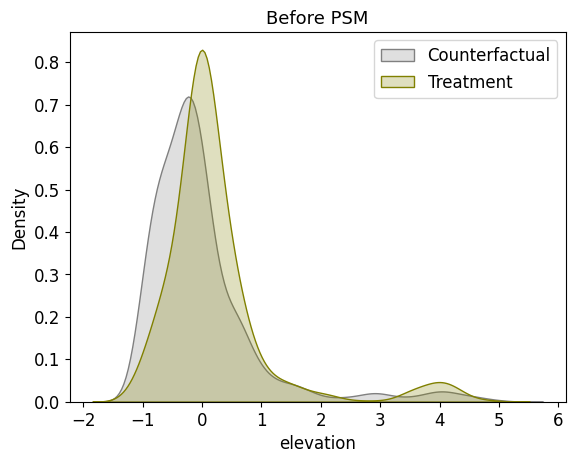

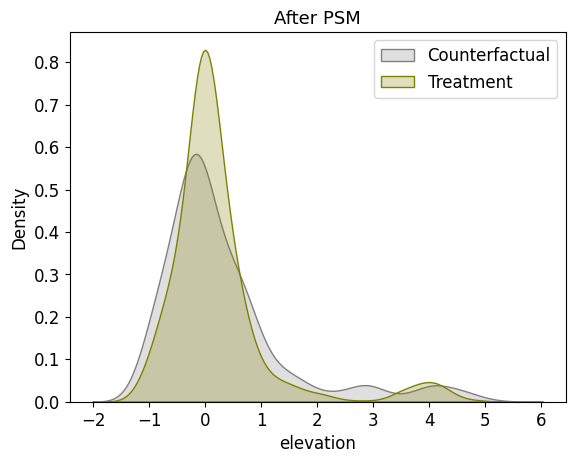

In [ ]:
kde_plot(treated_df, cf_df, 'elevation', 'olive', first)
print()
kde_plot(treated_dfn, cf_dfn, 'elevation', 'olive', second)

###Slope

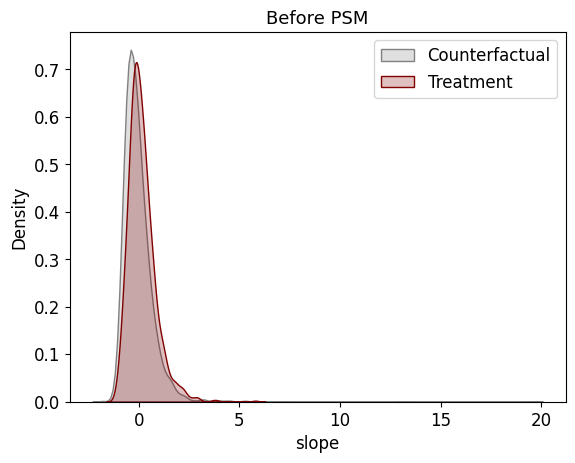

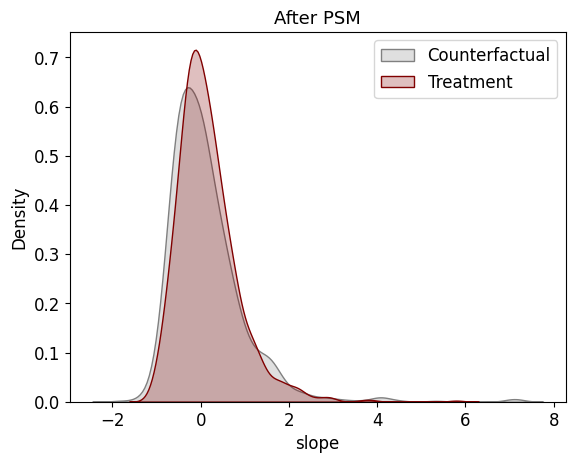

In [ ]:
kde_plot(treated_df, cf_df, 'slope', 'maroon', first)
print()
kde_plot(treated_dfn, cf_dfn, 'slope', 'maroon', second)

###Distance to Closest River

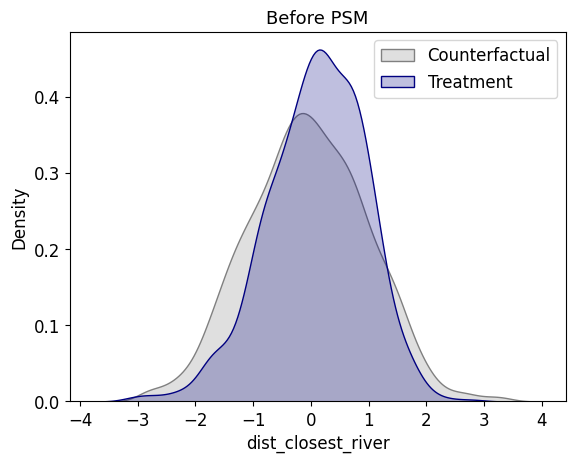

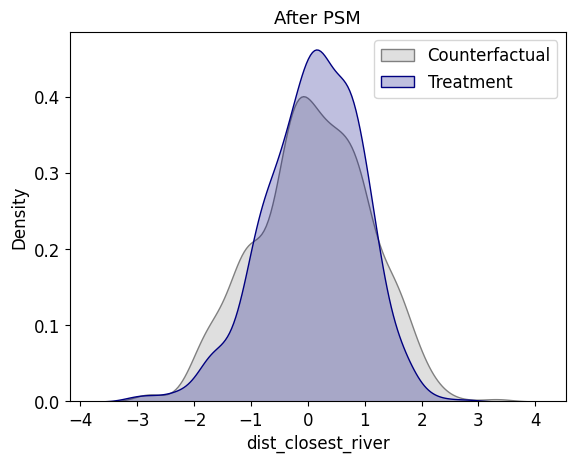

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

###Flow Accumulation

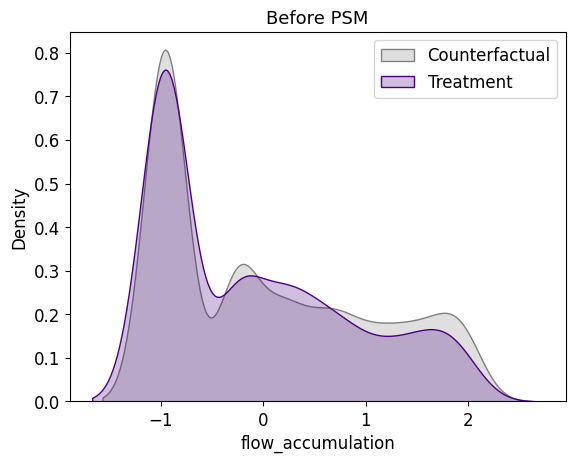

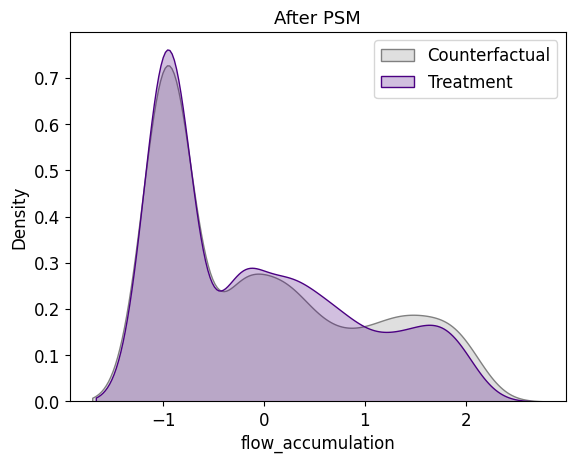

In [ ]:
kde_plot(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
kde_plot(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

###Distance to Closest Lineament

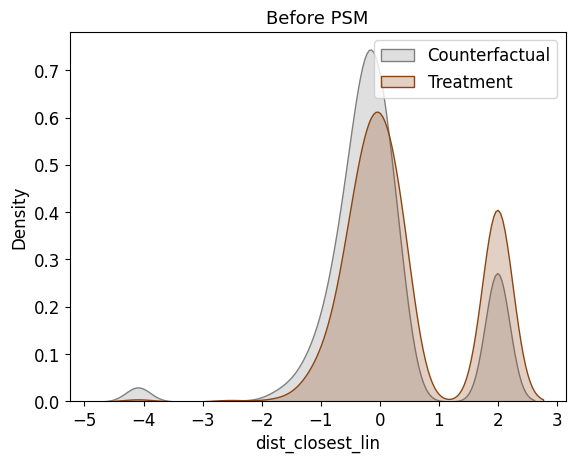

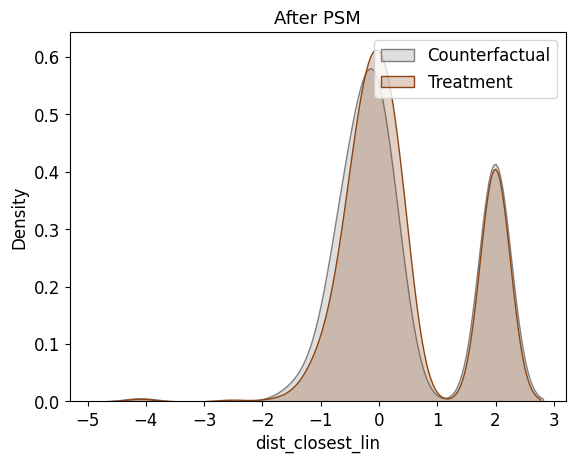

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

###Distance to Closest Road

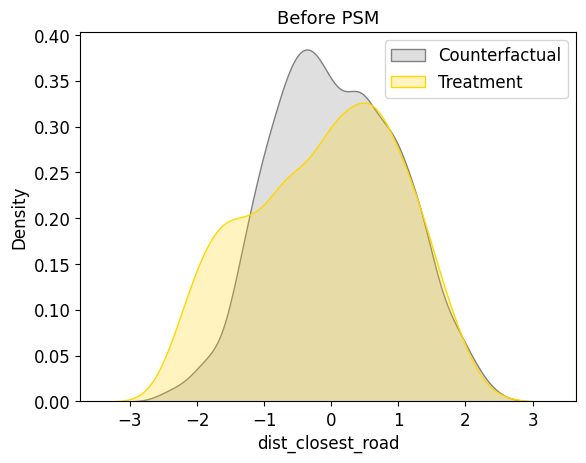

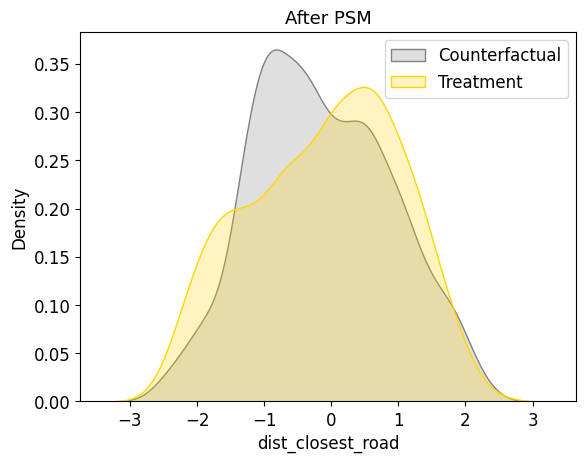

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

###Recent Cropping Intensity

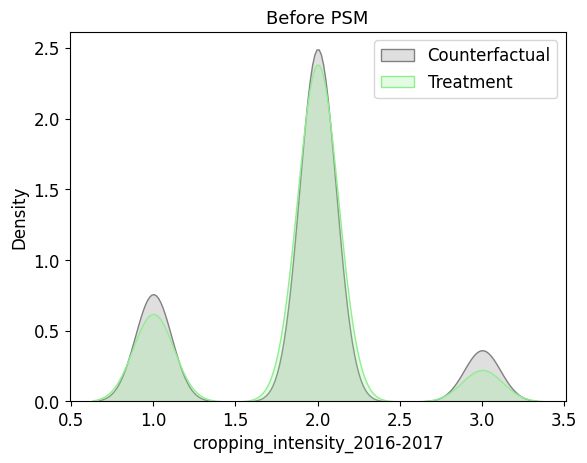

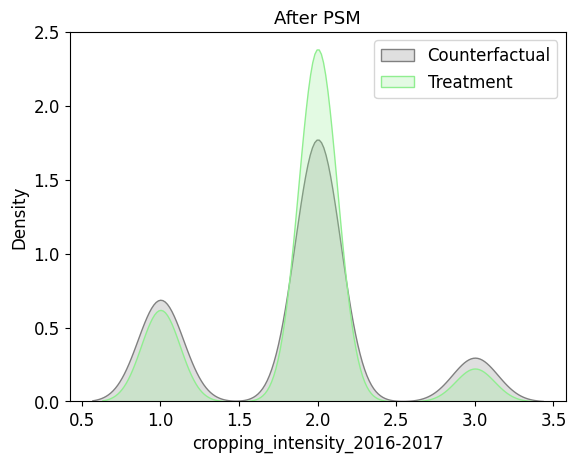

In [ ]:
kde_plot(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
kde_plot(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

###Distance to Closest Upstream Forest

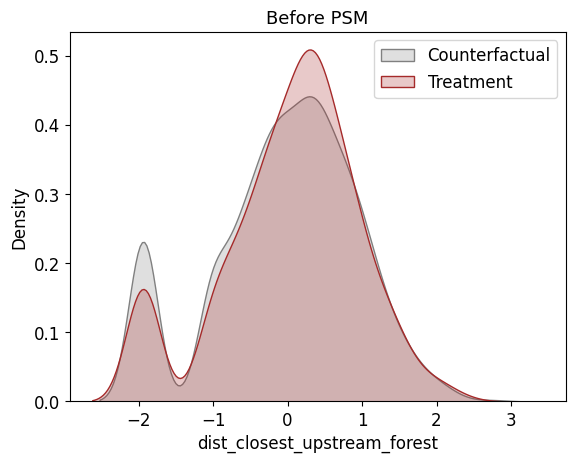

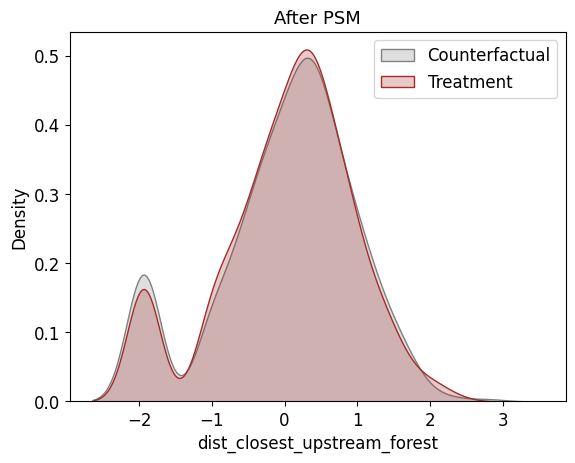

In [ ]:
kde_plot(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
kde_plot(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

###Proximity to Water Pixels

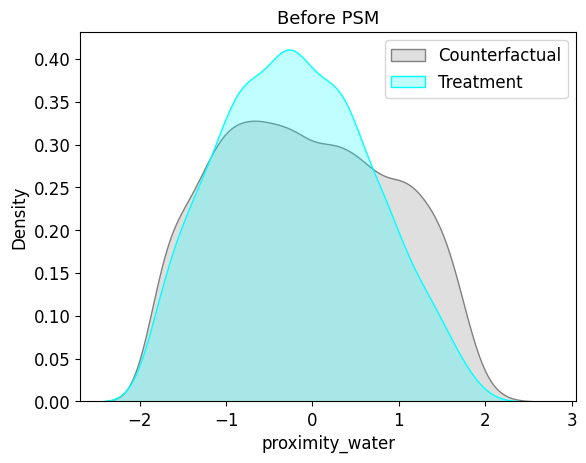

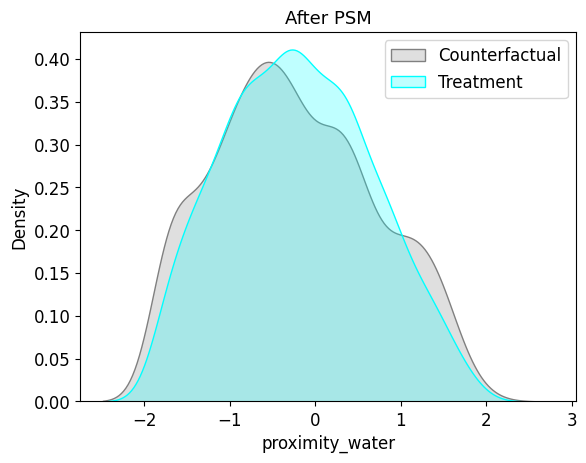

In [ ]:
kde_plot(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
kde_plot(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

###Drainage_density

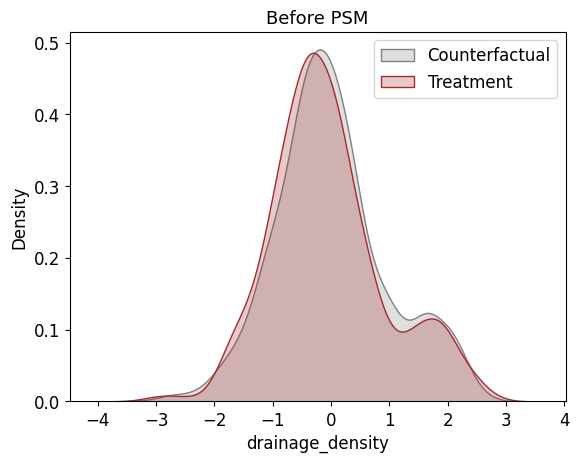

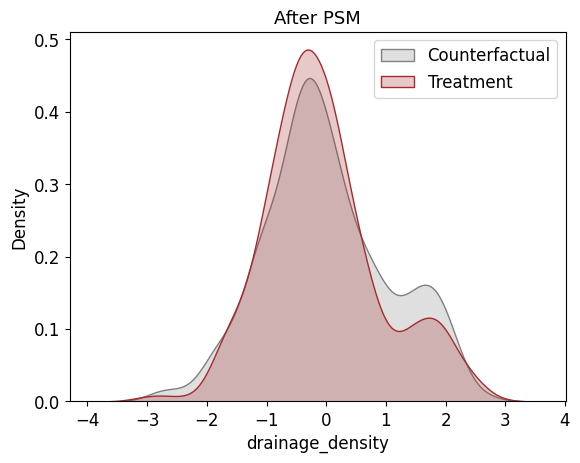

In [ ]:
kde_plot(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
kde_plot(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

###HSG

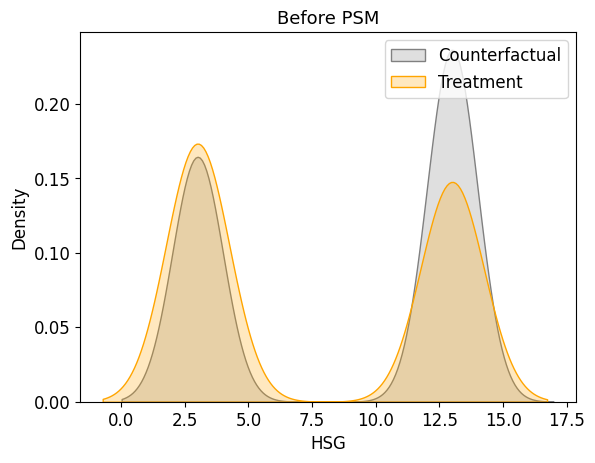

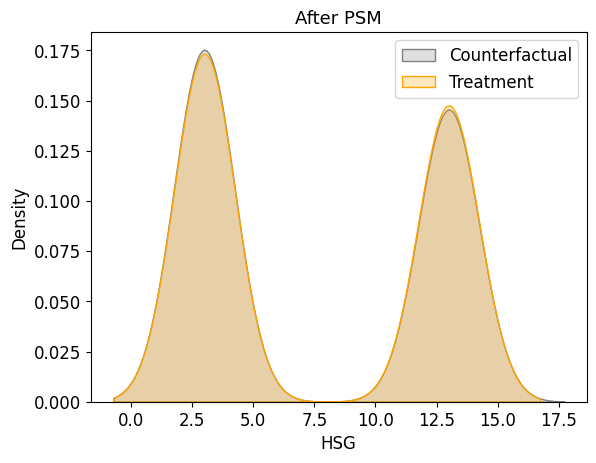

In [ ]:
kde_plot(treated_df, cf_df, 'HSG', 'orange', first)
print()
kde_plot(treated_dfn, cf_dfn, 'HSG', 'orange', second)

###CEC

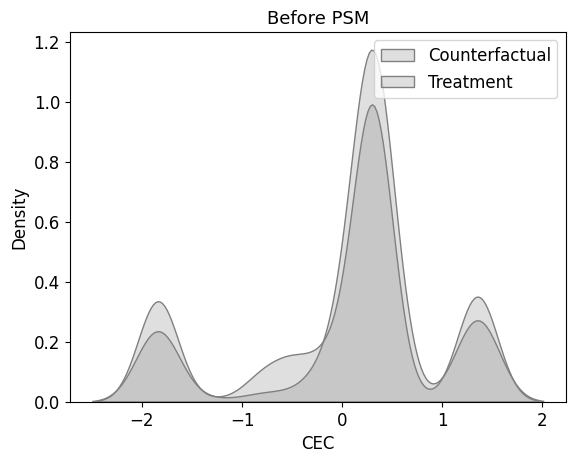

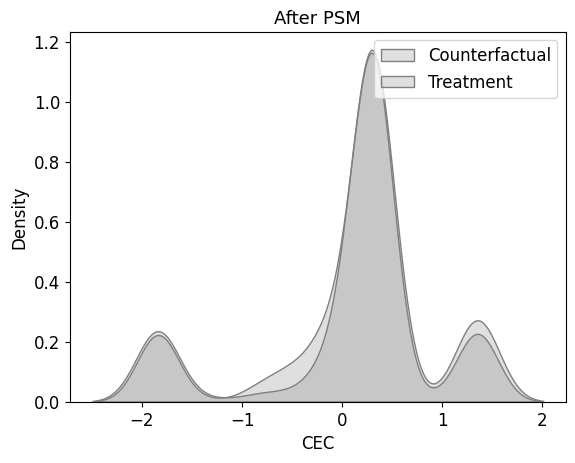

In [ ]:
kde_plot(treated_df, cf_df, 'CEC', 'grey', first)
print()
kde_plot(treated_dfn, cf_dfn, 'CEC', 'grey', second)

###PH

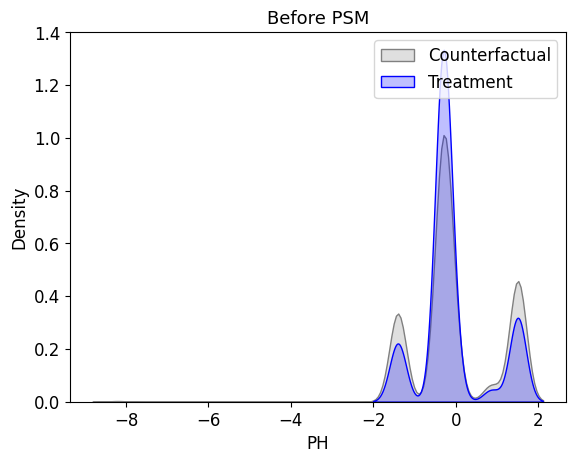

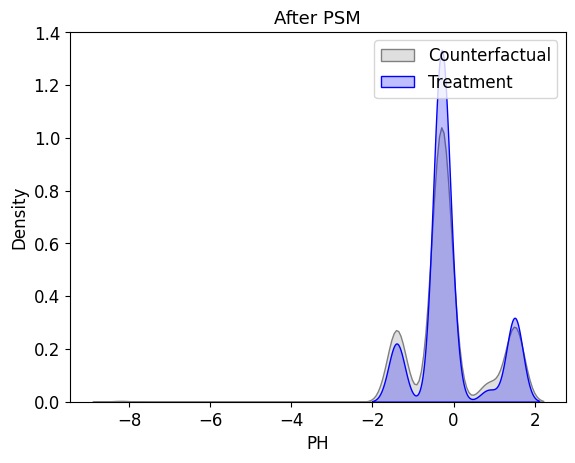

In [ ]:
kde_plot(treated_df, cf_df, 'PH', 'blue', first)
print()
kde_plot(treated_dfn, cf_dfn, 'PH', 'blue', second)

###OC

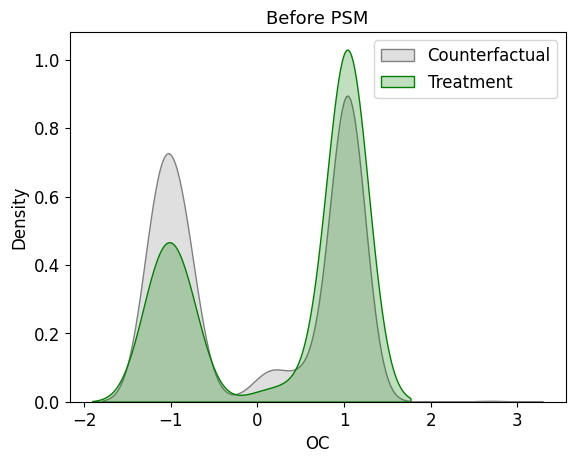

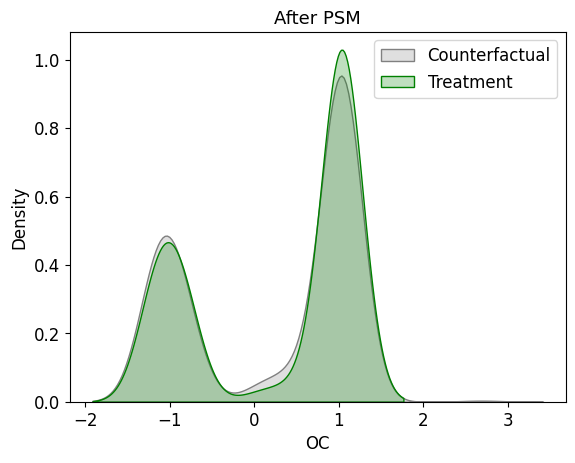

In [ ]:
kde_plot(treated_df, cf_df, 'OC', 'green', first)
print()
kde_plot(treated_dfn, cf_dfn, 'OC', 'green', second)

##KL Divergence

###Elevation

0      -0.619567
1      -0.752937
2      -0.825142
3      -0.774775
4      -0.602096
          ...   
1063   -0.029816
1064   -0.029068
1065   -0.073612
1066    0.005885
1067    0.024591
Name: elevation, Length: 1042, dtype: float64


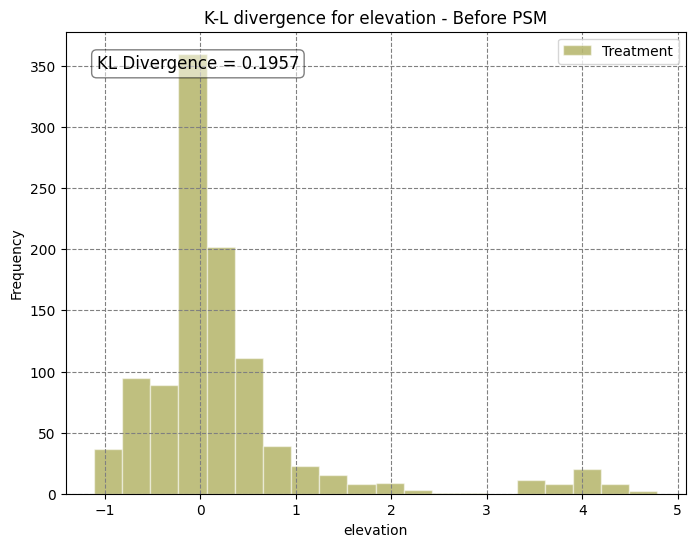


0      -0.619567
1      -0.694353
2      -0.752937
3      -0.825142
4      -0.774775
          ...   
1037   -0.041112
1038   -0.029816
1039   -0.029068
1040   -0.073612
1041    0.005885
Name: elevation, Length: 1042, dtype: float64


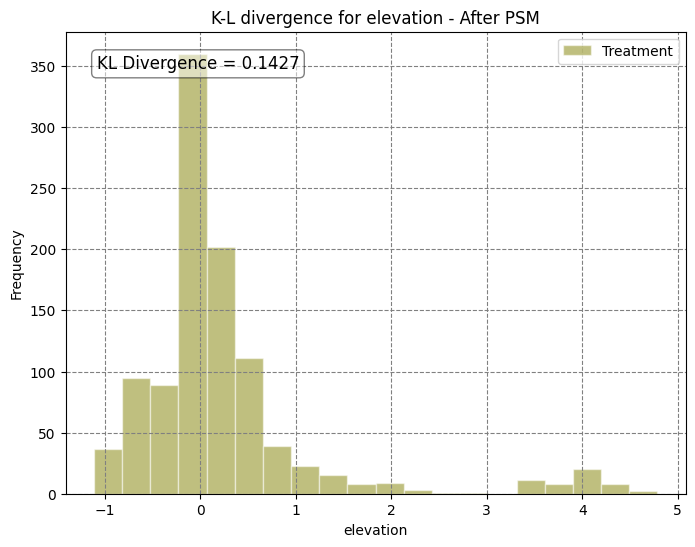

0.14265694444397362

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'elevation', 'olive', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'elevation', 'olive', second)

###Slope

0       0.350436
1      -0.457296
2      -0.704246
3       0.734745
4       0.993236
          ...   
1063   -0.212678
1064   -0.047988
1065   -0.432058
1066    0.453432
1067    1.265744
Name: slope, Length: 1042, dtype: float64


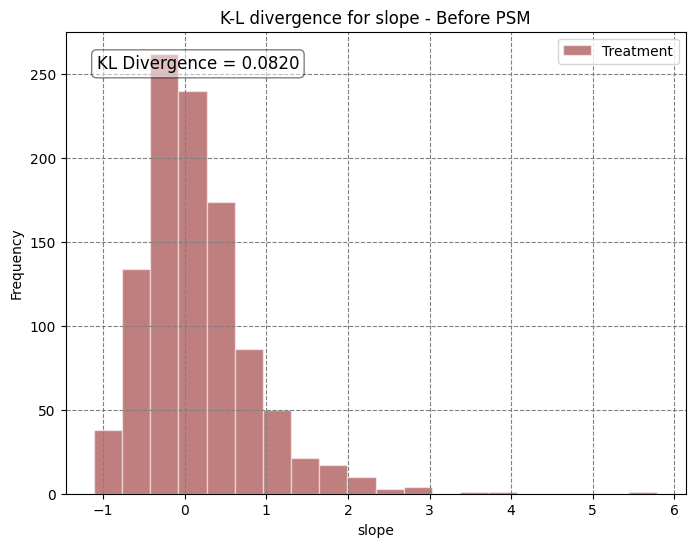


0       0.350436
1       0.443947
2      -0.457296
3      -0.704246
4       0.734745
          ...   
1037   -0.192646
1038   -0.212678
1039   -0.047988
1040   -0.432058
1041    0.453432
Name: slope, Length: 1042, dtype: float64


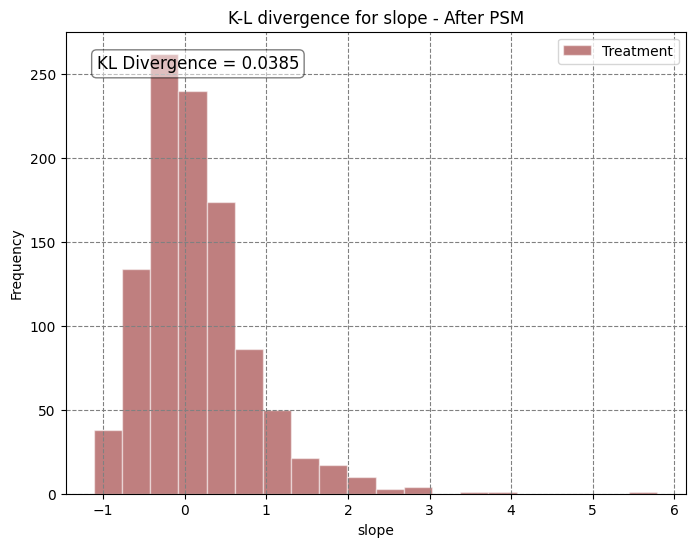

0.03854860408914976

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'slope', 'maroon', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'slope', 'maroon', second)

###Distance to Closest River

0       0.928141
1       1.293040
2       0.426324
3       0.848528
4       0.418406
          ...   
1063   -0.408753
1064   -0.656051
1065   -0.591762
1066   -0.423742
1067   -0.719526
Name: dist_closest_river, Length: 1042, dtype: float64


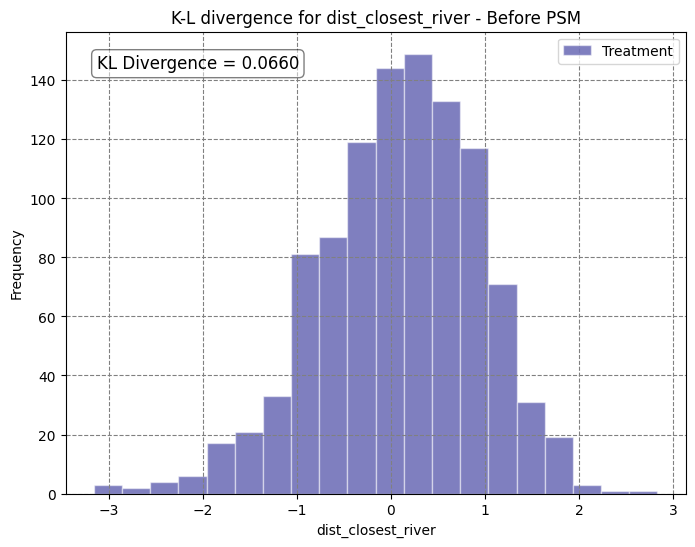


0       0.928141
1      -1.872404
2       1.293040
3       0.426324
4       0.848528
          ...   
1037   -0.314145
1038   -0.408753
1039   -0.656051
1040   -0.591762
1041   -0.423742
Name: dist_closest_river, Length: 1042, dtype: float64


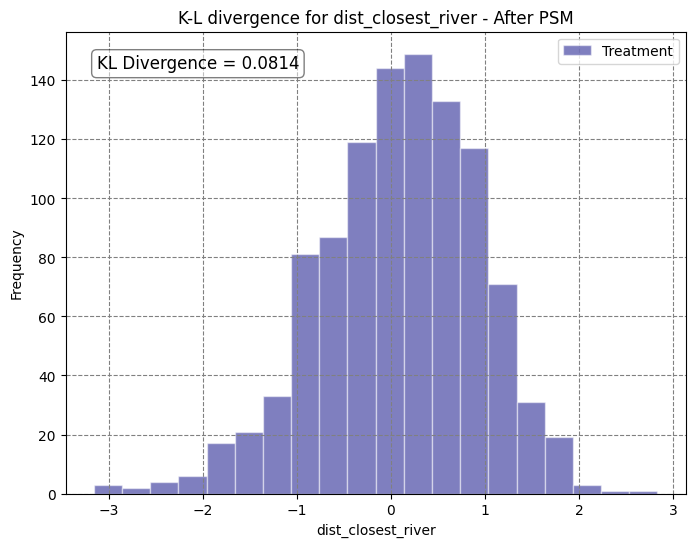

0.08137062825822955

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

###Flow Accumulation

0      -0.957141
1      -0.957141
2      -0.957141
3      -0.957141
4       0.423464
          ...   
1063    1.548266
1064   -0.957141
1065   -0.957141
1066   -0.957141
1067   -0.957141
Name: flow_accumulation, Length: 1042, dtype: float64


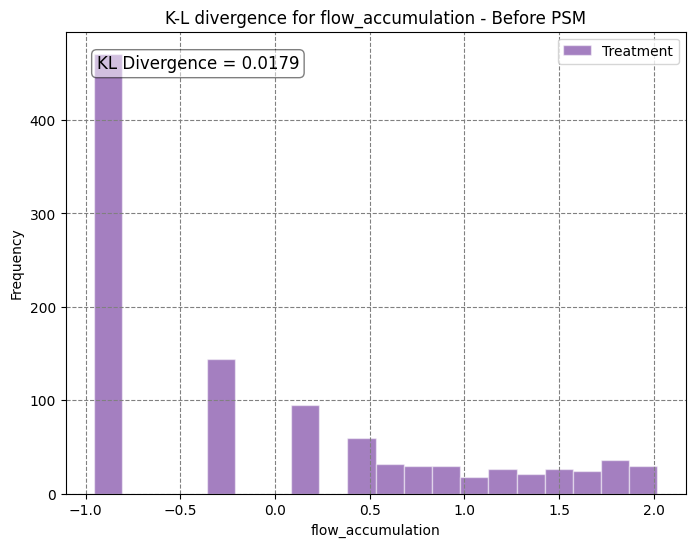


0      -0.957141
1       1.023651
2      -0.957141
3      -0.957141
4      -0.957141
          ...   
1037   -0.957141
1038    1.548266
1039   -0.957141
1040   -0.957141
1041   -0.957141
Name: flow_accumulation, Length: 1042, dtype: float64


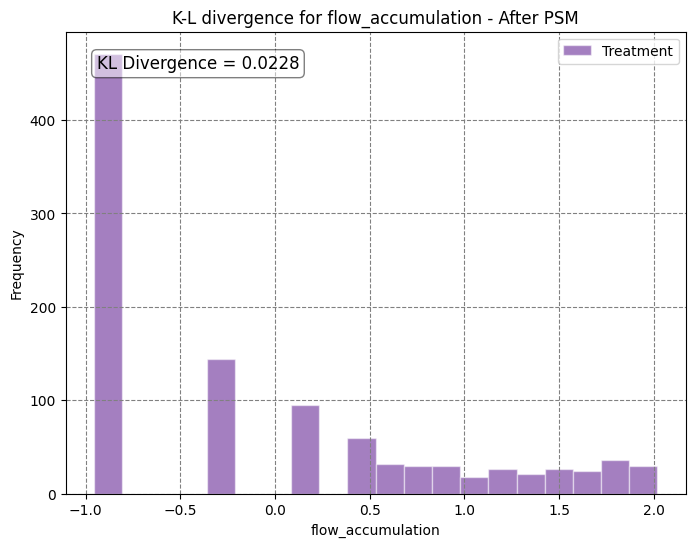

0.02283989080734984

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

###Distance to Closest Lineament

0      -0.700182
1       0.188764
2      -0.467814
3      -0.134451
4      -0.039732
          ...   
1063    0.181055
1064    0.092508
1065    0.074468
1066    0.143671
1067    0.138770
Name: dist_closest_lin, Length: 1042, dtype: float64


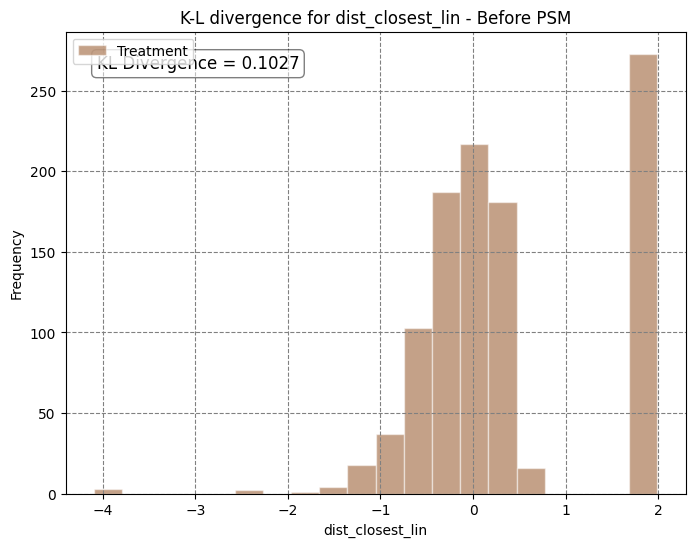


0      -0.700182
1      -0.368883
2       0.188764
3      -0.467814
4      -0.134451
          ...   
1037    0.104991
1038    0.181055
1039    0.092508
1040    0.074468
1041    0.143671
Name: dist_closest_lin, Length: 1042, dtype: float64


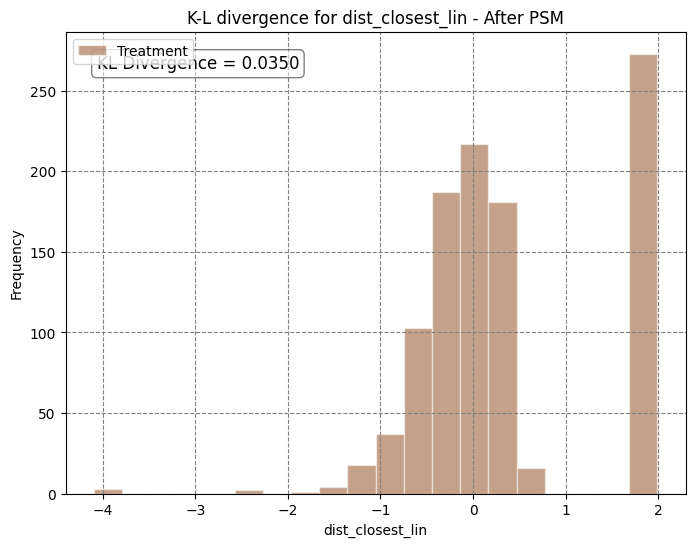

0.03504310762618771

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

###Distance to Closest Road

0      -1.906862
1      -0.979734
2      -1.141298
3      -1.469108
4      -0.816671
          ...   
1063    0.110072
1064    0.711785
1065    0.944650
1066    0.130506
1067    0.778838
Name: dist_closest_road, Length: 1042, dtype: float64


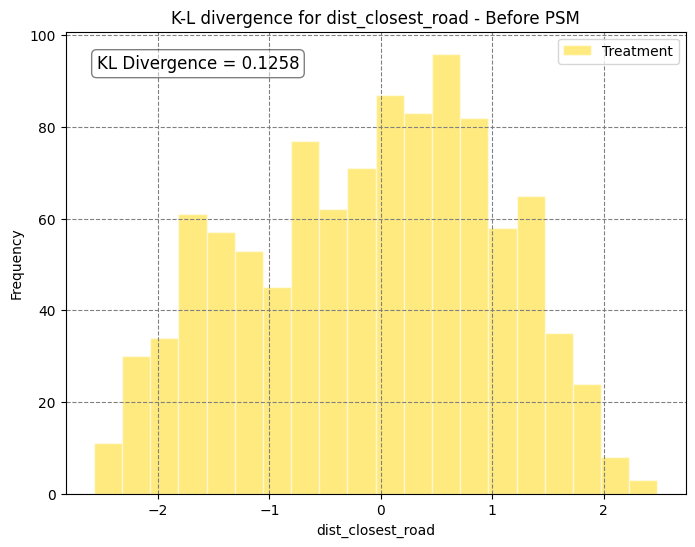


0      -1.906862
1      -1.217261
2      -0.979734
3      -1.141298
4      -1.469108
          ...   
1037    0.956350
1038    0.110072
1039    0.711785
1040    0.944650
1041    0.130506
Name: dist_closest_road, Length: 1042, dtype: float64


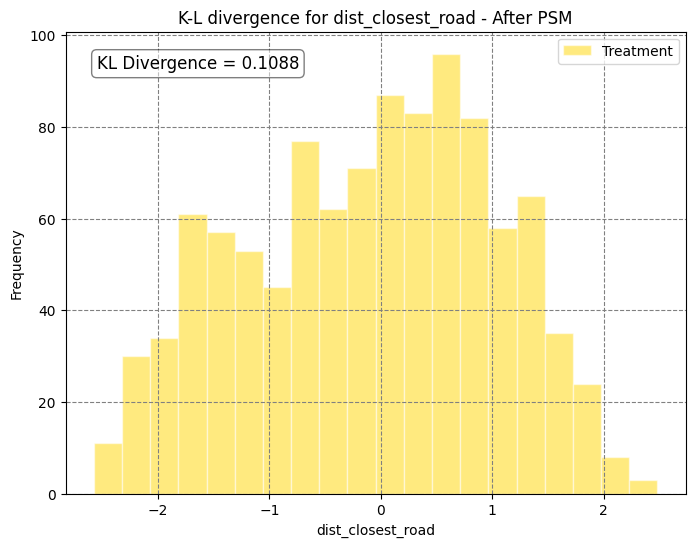

0.10884078951614978

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

###Recent Cropping Intensity

0       1.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
1063    2.0
1064    2.0
1065    2.0
1066    2.0
1067    2.0
Name: cropping_intensity_2016-2017, Length: 1042, dtype: float64


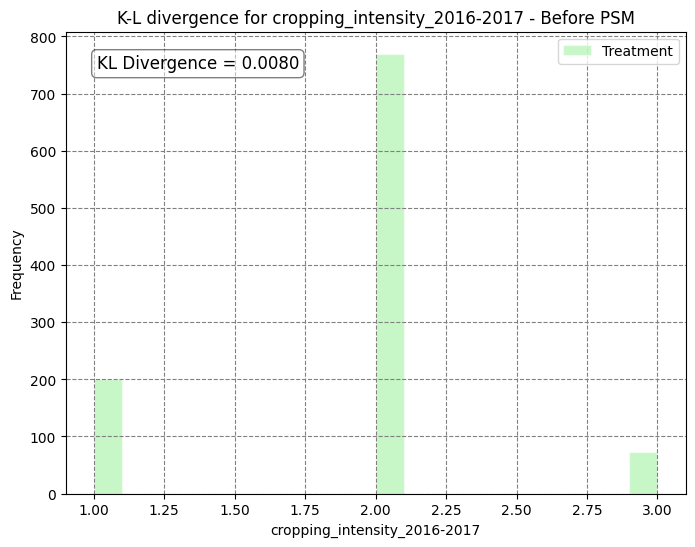


0       1.0
1       3.0
2       2.0
3       1.0
4       2.0
       ... 
1037    2.0
1038    2.0
1039    2.0
1040    2.0
1041    2.0
Name: cropping_intensity_2016-2017, Length: 1042, dtype: float64


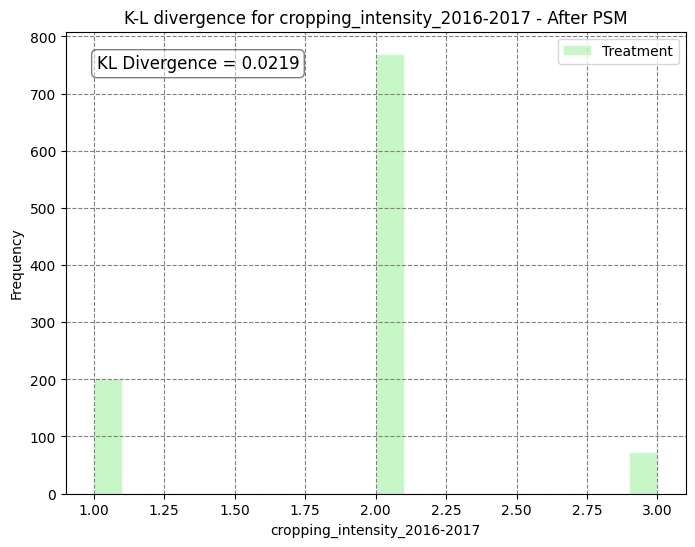

0.021906107831653247

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

###Distance to Closest Upstream Forest

0       0.306115
1       0.820163
2      -0.141779
3       1.729130
4      -1.937200
          ...   
1063   -0.290084
1064    0.178180
1065   -1.027245
1066    0.405153
1067   -0.024847
Name: dist_closest_upstream_forest, Length: 1042, dtype: float64


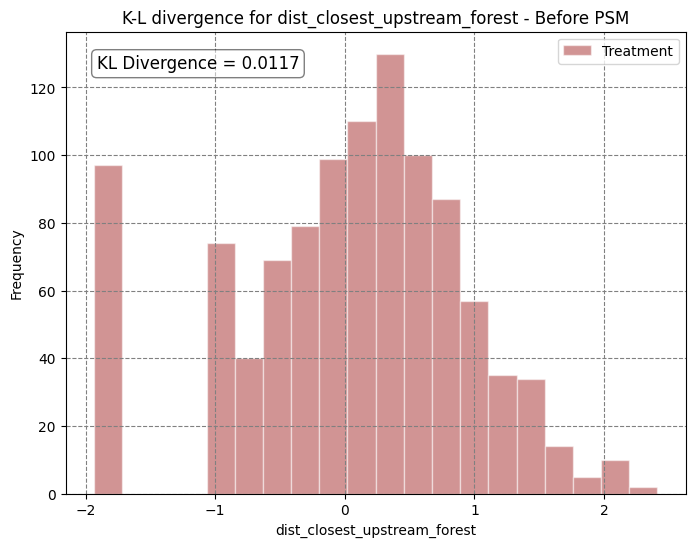


0       0.306115
1      -0.062267
2       0.820163
3      -0.141779
4       1.729130
          ...   
1037    0.942272
1038   -0.290084
1039    0.178180
1040   -1.027245
1041    0.405153
Name: dist_closest_upstream_forest, Length: 1042, dtype: float64


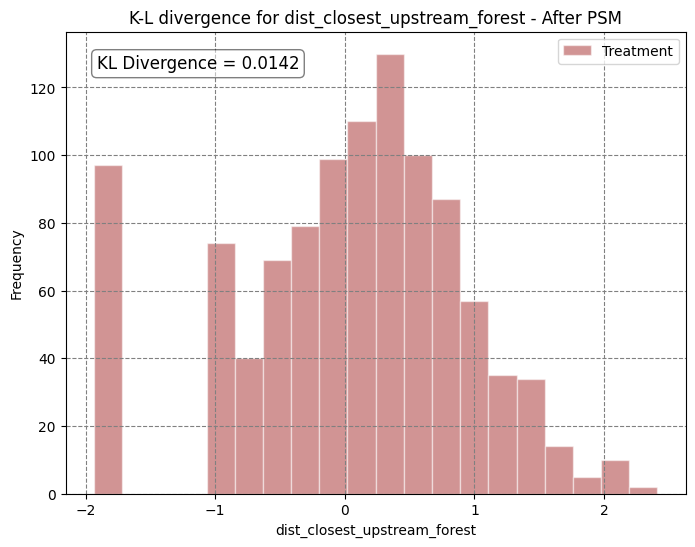

0.014247044975626948

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

###Proximity to Water Pixels

0       0.000624
1       0.429965
2       0.157241
3       0.812527
4       1.205923
          ...   
1063   -0.417439
1064   -0.779313
1065   -0.122670
1066   -0.103095
1067   -0.757033
Name: proximity_water, Length: 1042, dtype: float64


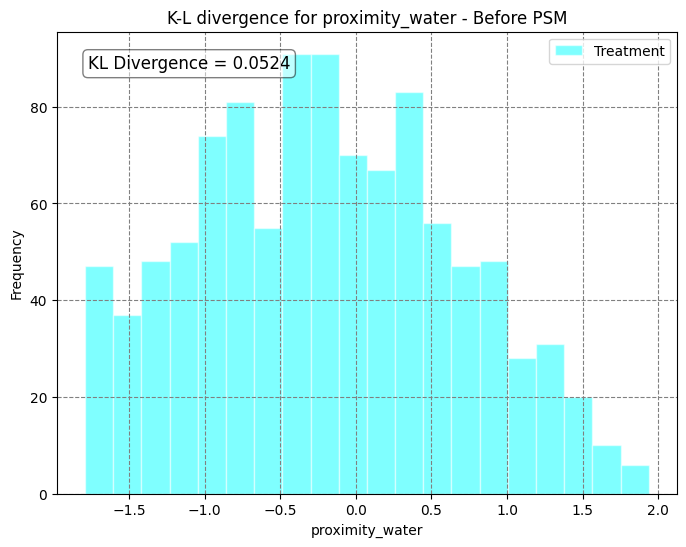


0       0.000624
1       0.448714
2       0.429965
3       0.157241
4       0.812527
          ...   
1037   -1.013820
1038   -0.417439
1039   -0.779313
1040   -0.122670
1041   -0.103095
Name: proximity_water, Length: 1042, dtype: float64


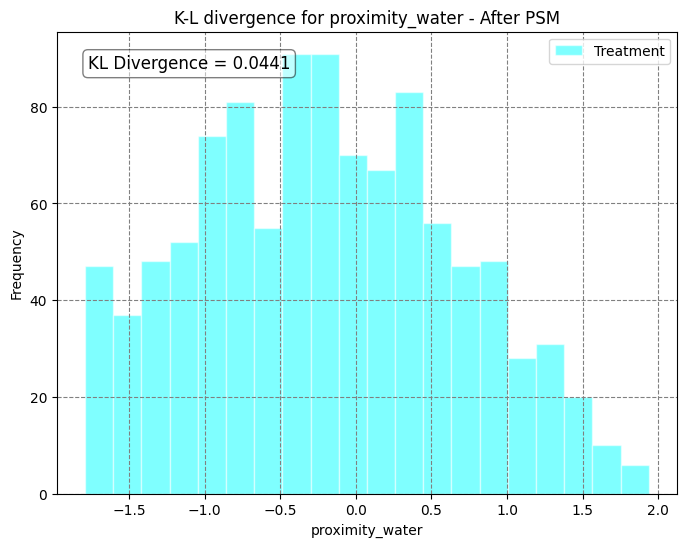

0.044089981724920534

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

###Drainage_density

0       2.644864
1       1.976942
2       0.960050
3       0.455174
4       0.681376
          ...   
1063   -0.691581
1064   -0.008847
1065   -0.305285
1066    0.106045
1067    0.128379
Name: drainage_density, Length: 1042, dtype: float64


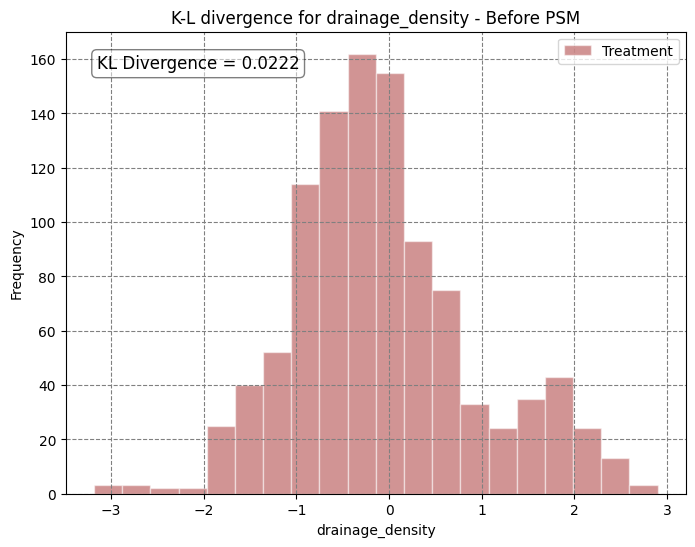


0       2.644864
1       0.220019
2       1.976942
3       0.960050
4       0.455174
          ...   
1037   -0.220171
1038   -0.691581
1039   -0.008847
1040   -0.305285
1041    0.106045
Name: drainage_density, Length: 1042, dtype: float64


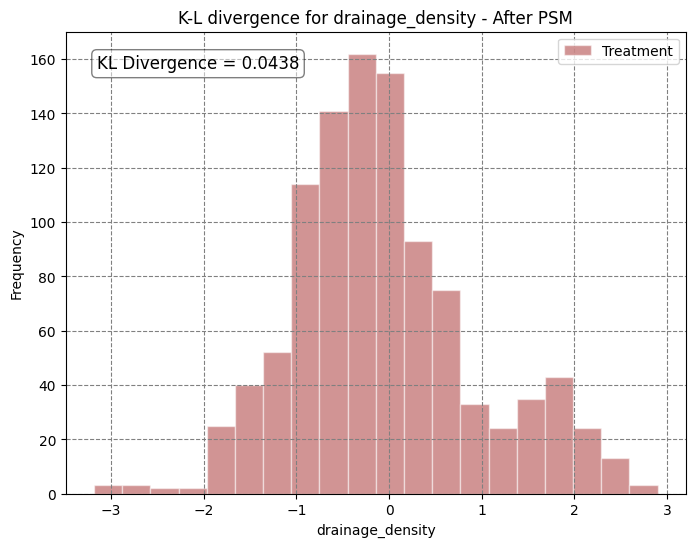

0.04383334881886833

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

###HSG

0        3.0
1        3.0
2       13.0
3       13.0
4        3.0
        ... 
1063    13.0
1064    13.0
1065    13.0
1066     3.0
1067     3.0
Name: HSG, Length: 1042, dtype: float64


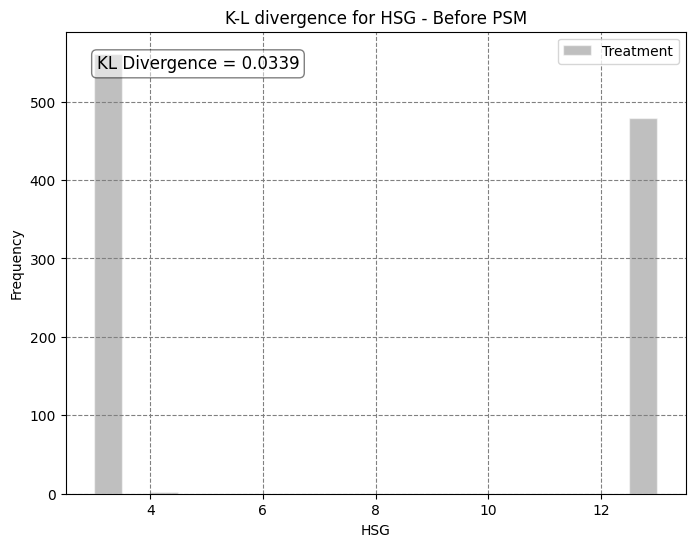


0        3.0
1        3.0
2        3.0
3       13.0
4       13.0
        ... 
1037    13.0
1038    13.0
1039    13.0
1040    13.0
1041     3.0
Name: HSG, Length: 1042, dtype: float64


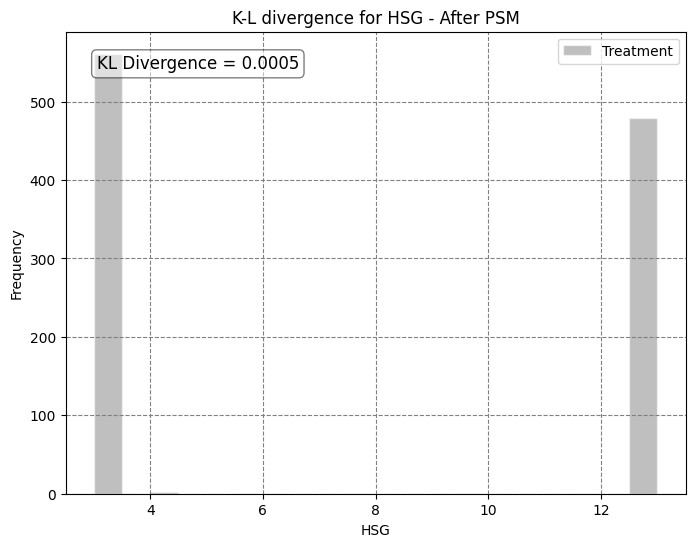

0.0004752424471069338

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'HSG', 'grey', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'HSG', 'grey', second)

###CEC

0       0.304373
1      -0.485743
2      -0.796380
3      -0.796380
4       0.304373
          ...   
1063    0.304373
1064    0.304373
1065    0.304373
1066    0.304373
1067    0.304373
Name: CEC, Length: 1042, dtype: float64


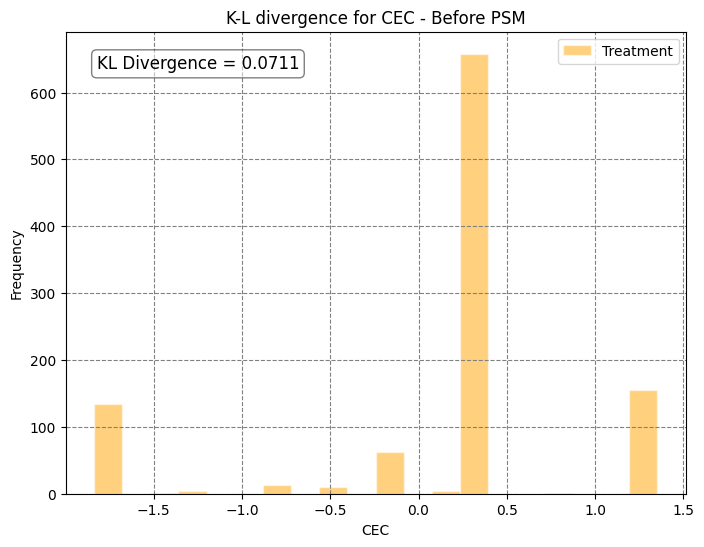


0       0.304373
1      -1.839445
2      -0.485743
3      -0.796380
4      -0.796380
          ...   
1037    0.304373
1038    0.304373
1039    0.304373
1040    0.304373
1041    0.304373
Name: CEC, Length: 1042, dtype: float64


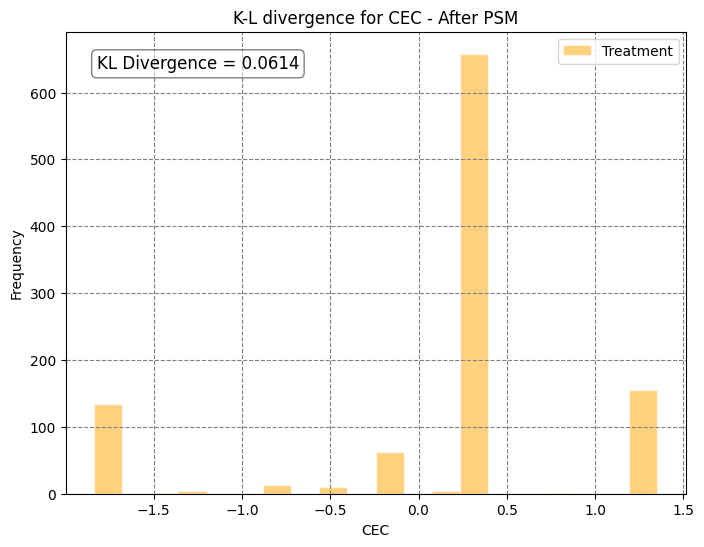

0.06143943756557142

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'CEC', 'orange', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'CEC', 'orange', second)

###PH

0      -1.406058
1       1.504017
2      -1.406058
3      -1.406058
4      -0.309396
          ...   
1063   -0.309396
1064   -0.309396
1065   -0.309396
1066   -0.309396
1067   -0.309396
Name: PH, Length: 1042, dtype: float64


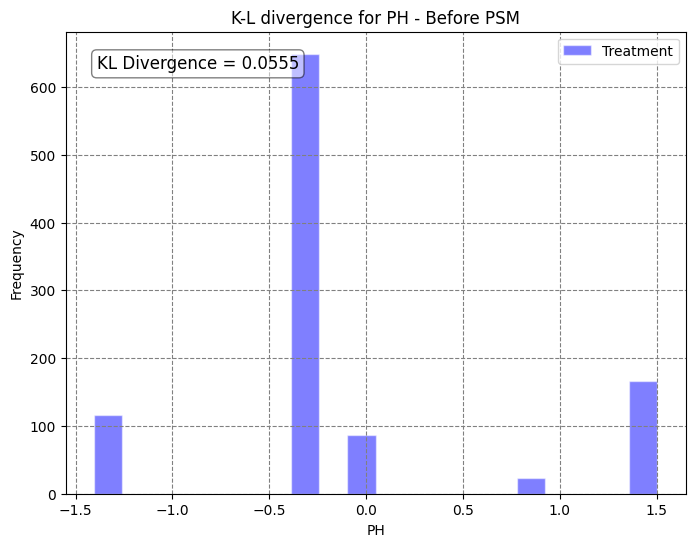


0      -1.406058
1      -0.093962
2       1.504017
3      -1.406058
4      -1.406058
          ...   
1037   -0.309396
1038   -0.309396
1039   -0.309396
1040   -0.309396
1041   -0.309396
Name: PH, Length: 1042, dtype: float64


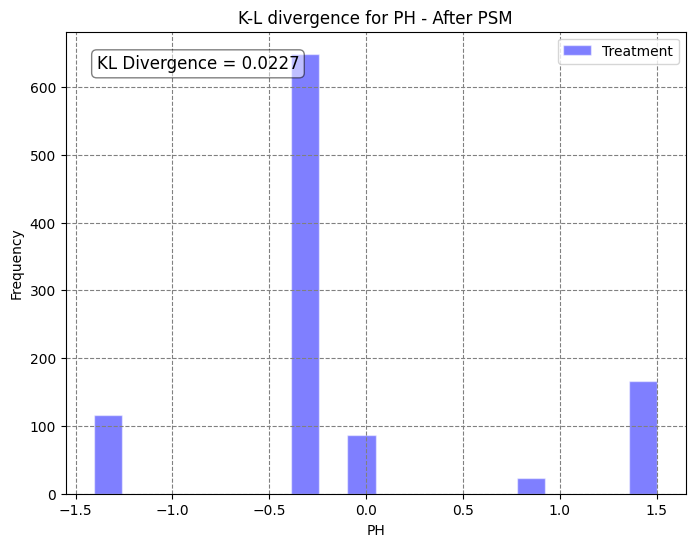

0.022737751989623356

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'PH', 'blue', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'PH', 'blue', second)

###OC

0      -1.131092
1      -1.018065
2       0.159465
3       0.159465
4       1.044892
          ...   
1063    1.044892
1064    1.044892
1065    1.044892
1066    1.044892
1067    1.044892
Name: OC, Length: 1042, dtype: float64


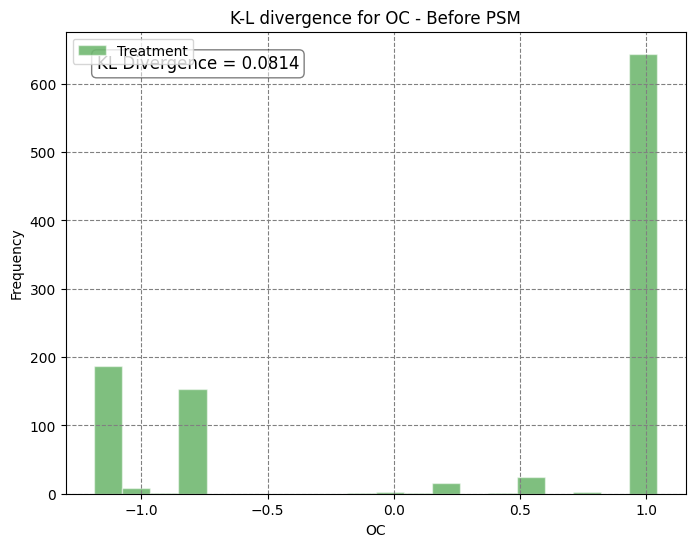


0      -1.131092
1      -1.131092
2      -1.018065
3       0.159465
4       0.159465
          ...   
1037    1.044892
1038    1.044892
1039    1.044892
1040    1.044892
1041    1.044892
Name: OC, Length: 1042, dtype: float64


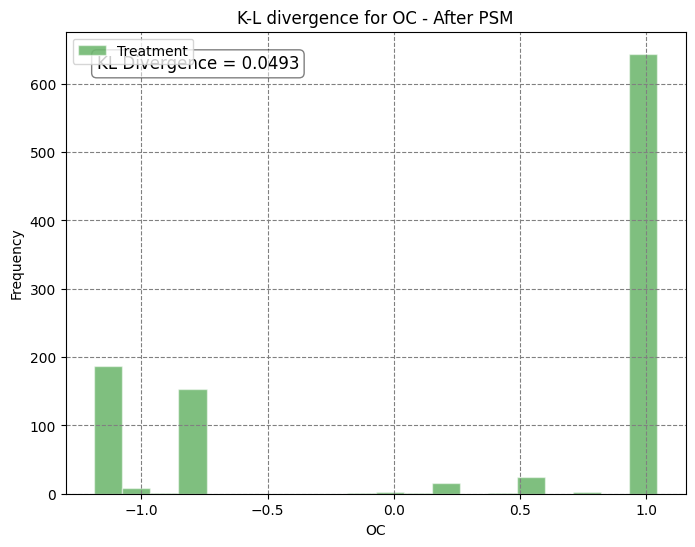

0.04927375325790315

In [ ]:
compute_and_plot_kl_divergence(treated_df, cf_df, 'OC', 'green', first)
print()
compute_and_plot_kl_divergence(treated_dfn, cf_dfn, 'OC', 'green', second)

##QQ Plot

###Elevation

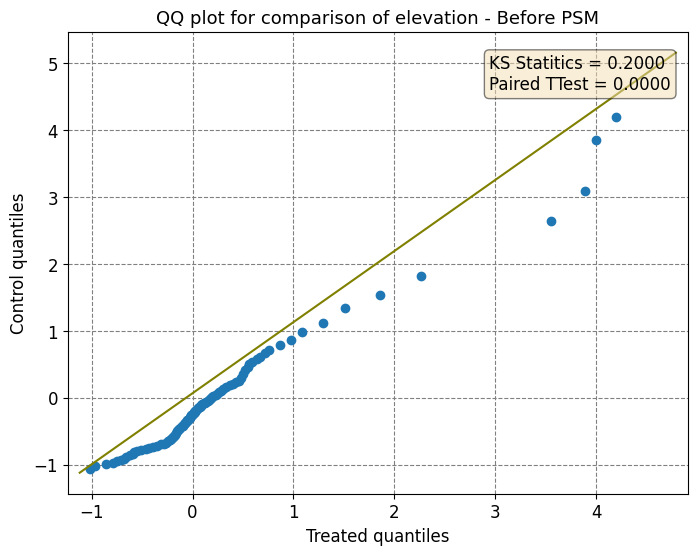

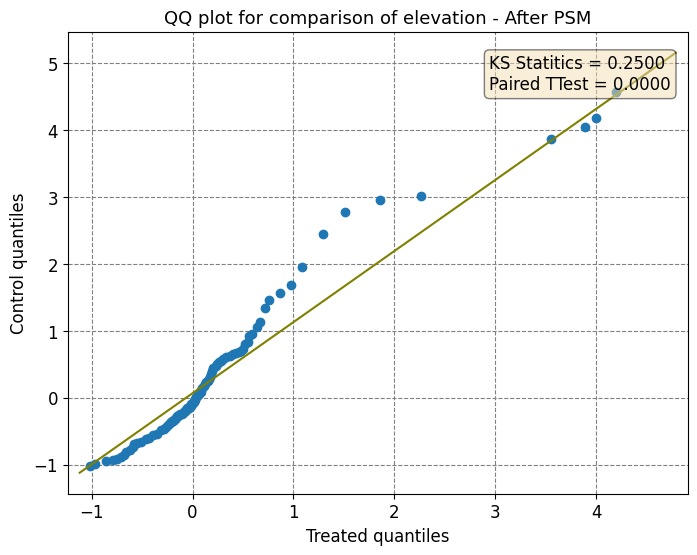

In [ ]:
generate_qq_plot(treated_df, cf_df, 'elevation', 'olive', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'elevation', 'olive', second)

###Slope

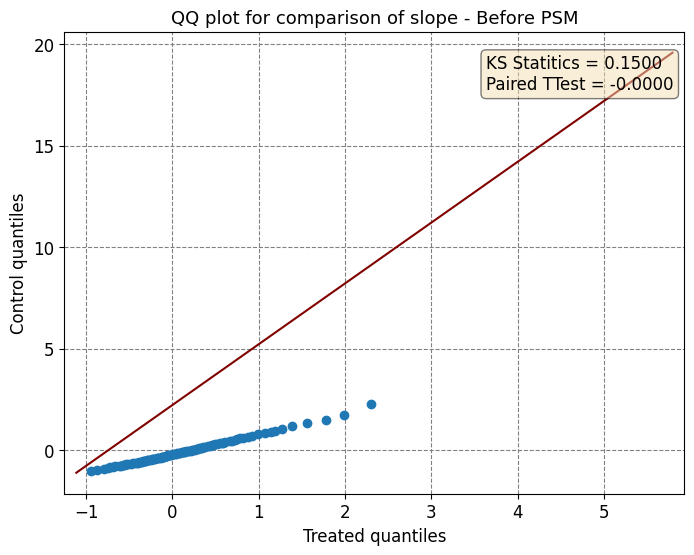

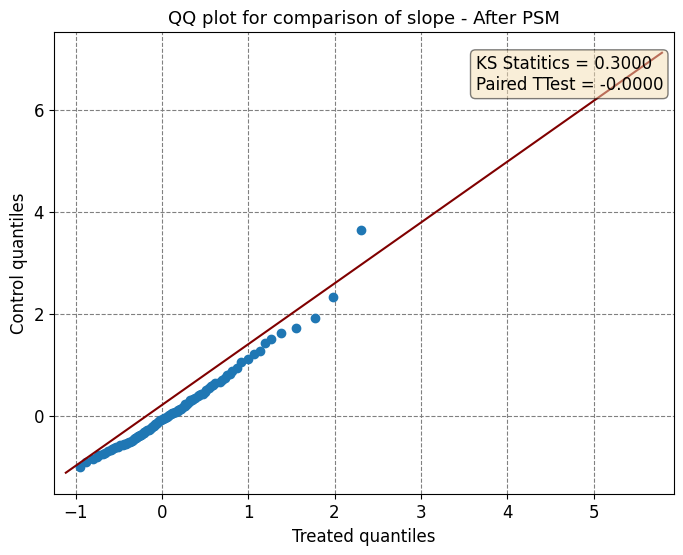

In [ ]:
generate_qq_plot(treated_df, cf_df, 'slope', 'maroon', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'slope', 'maroon', second)

###Distance to Closest River

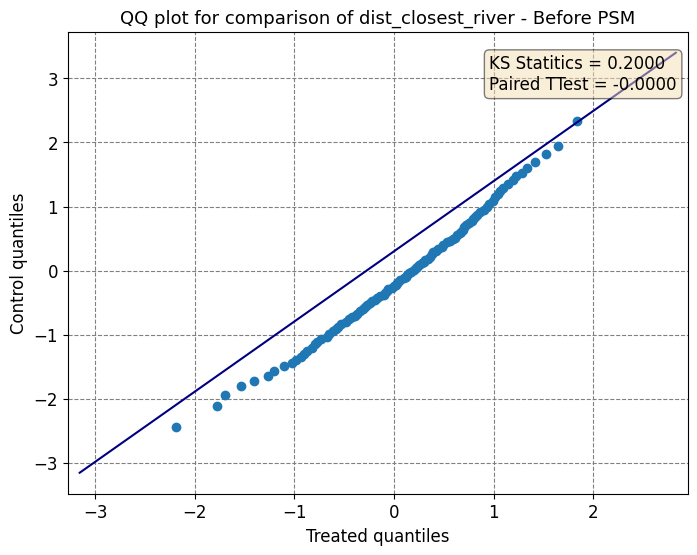

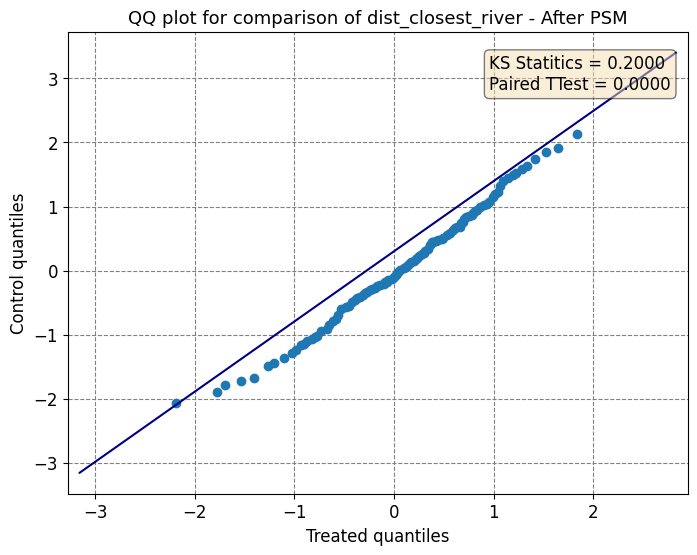

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

###Flow Accumulation

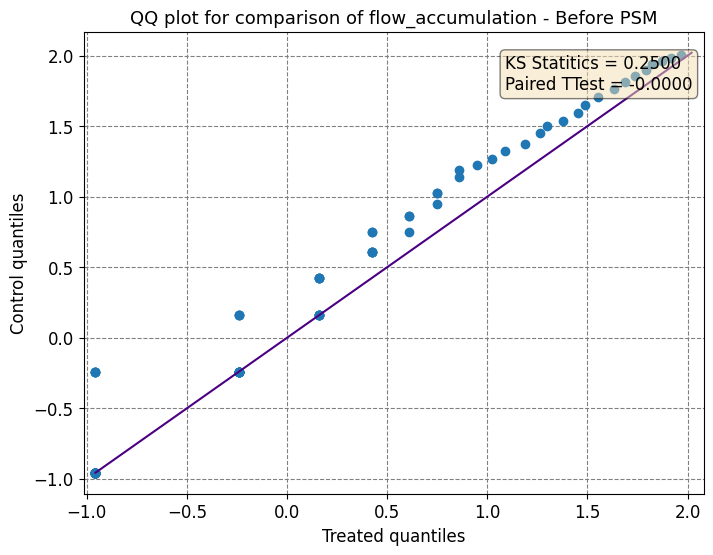

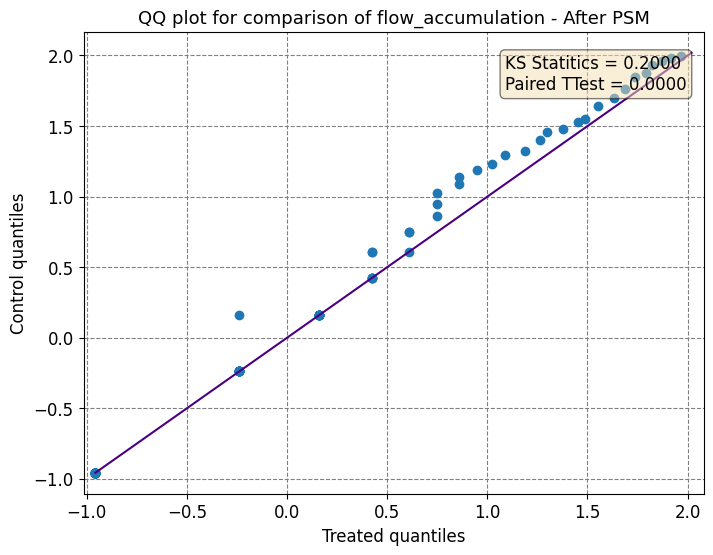

In [ ]:
generate_qq_plot(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

###Distance to Closest Lineament

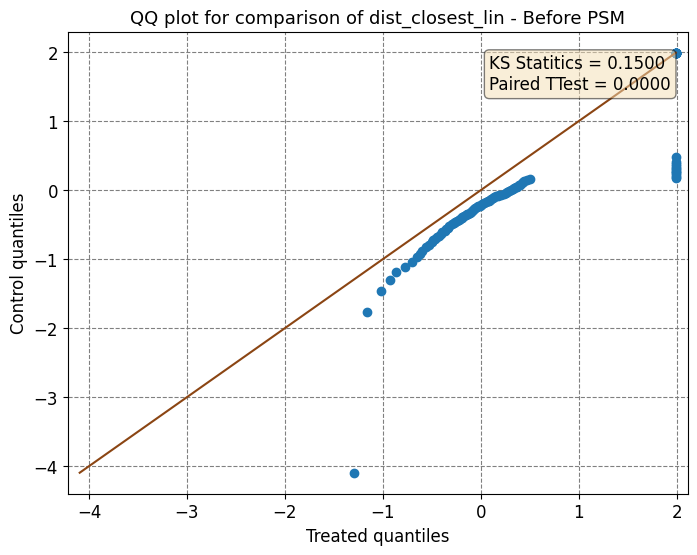

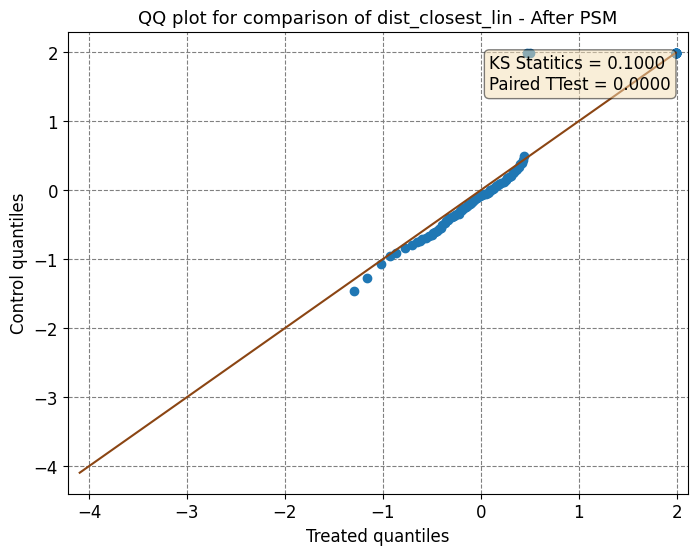

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

###Distance to Closest Road

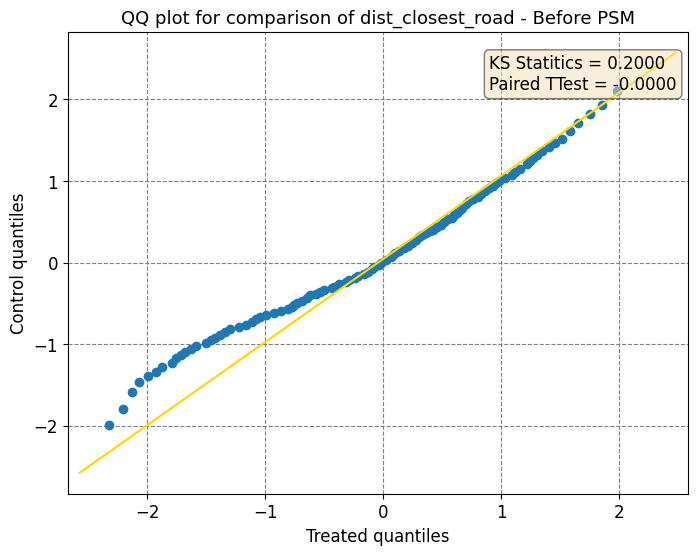

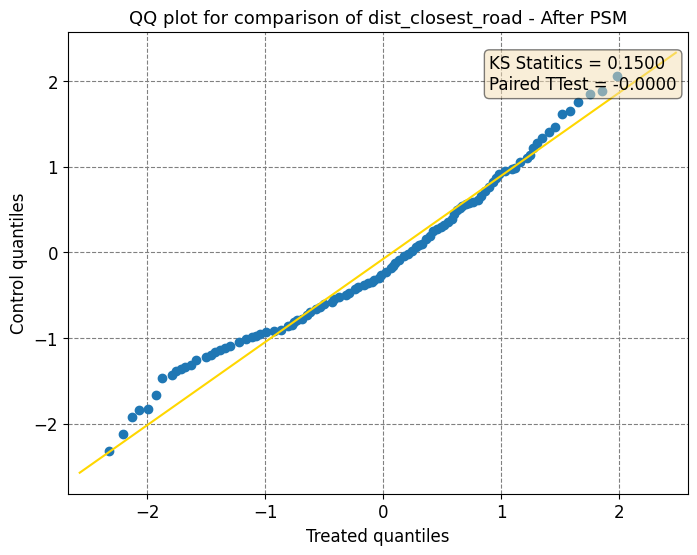

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

###Recent Cropping Intensity

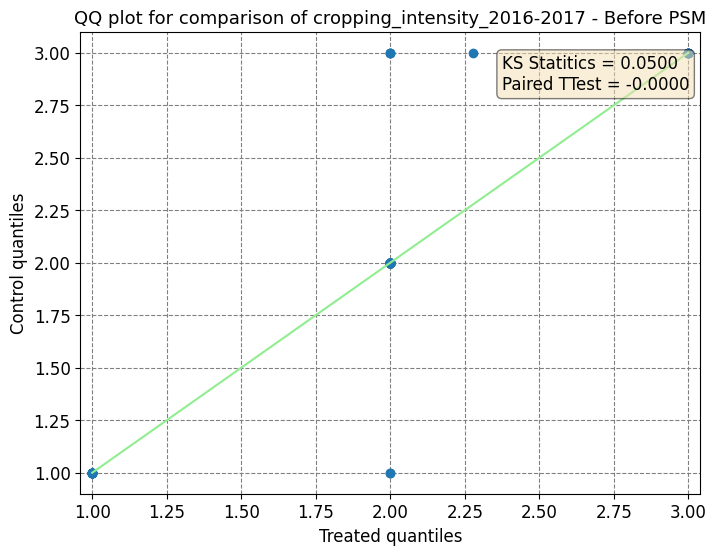

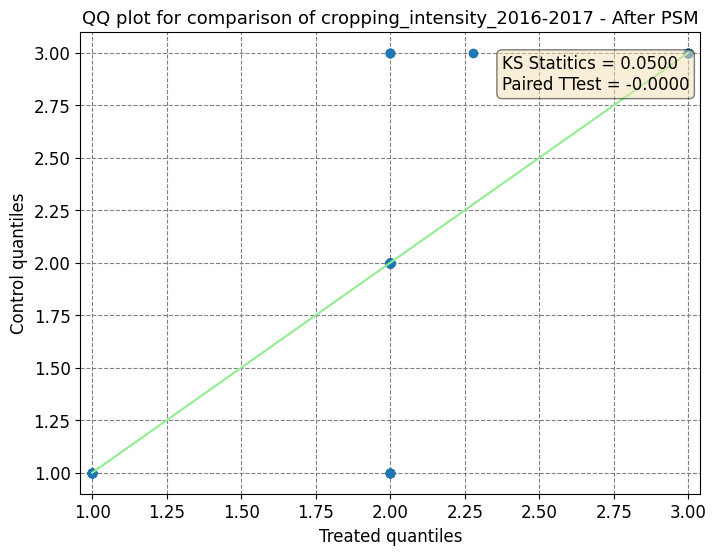

In [ ]:
generate_qq_plot(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

###Distance to Closest Upstream Forest

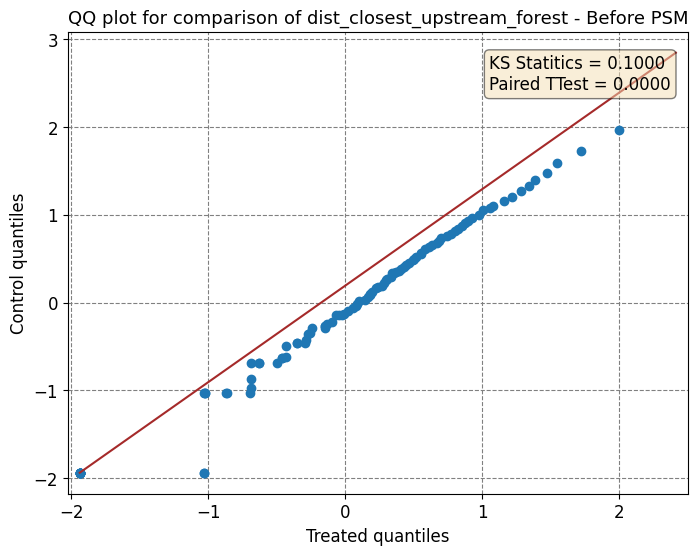

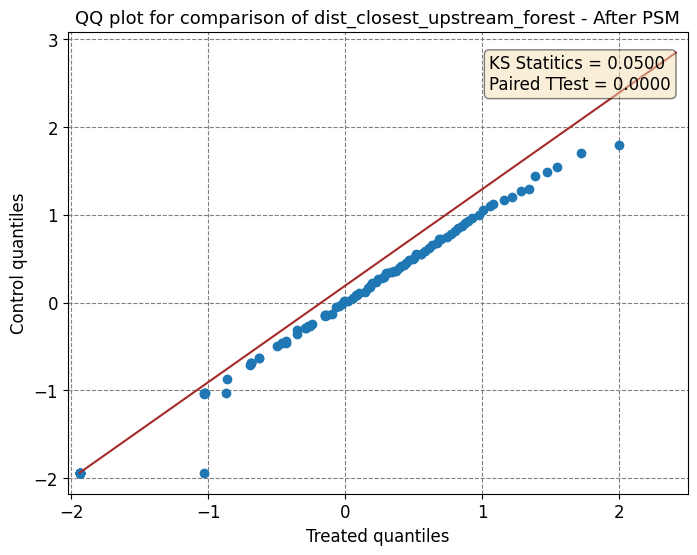

In [ ]:
generate_qq_plot(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

###Proximity to Water Pixels

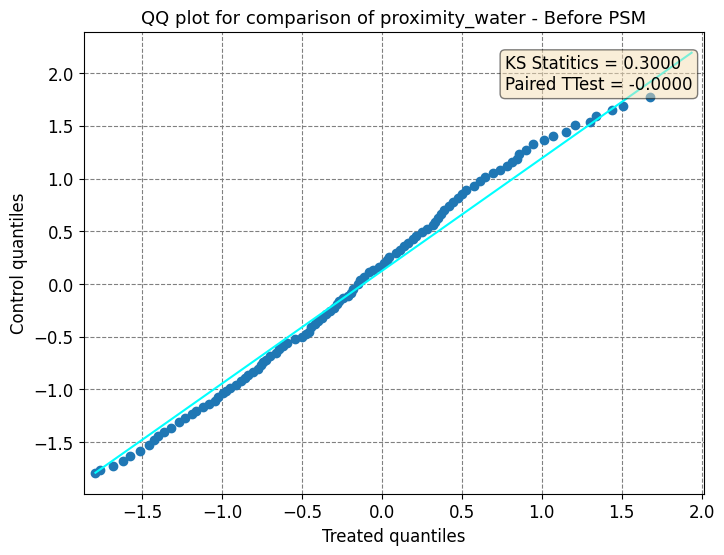

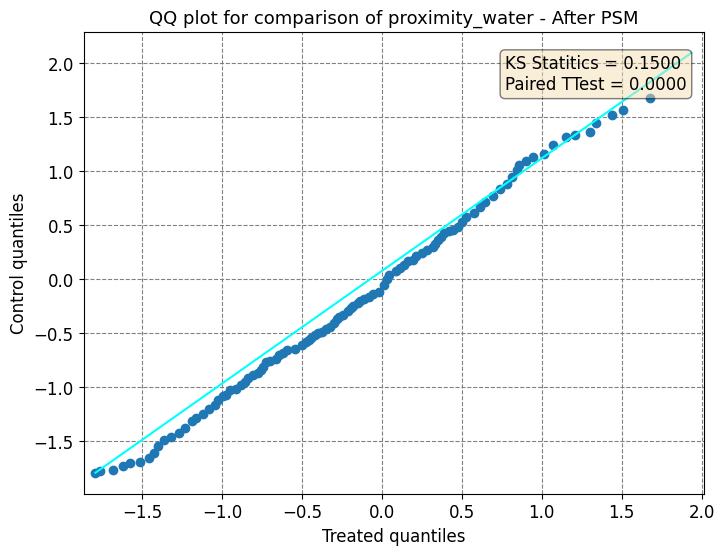

In [ ]:
generate_qq_plot(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

###Drainage_density

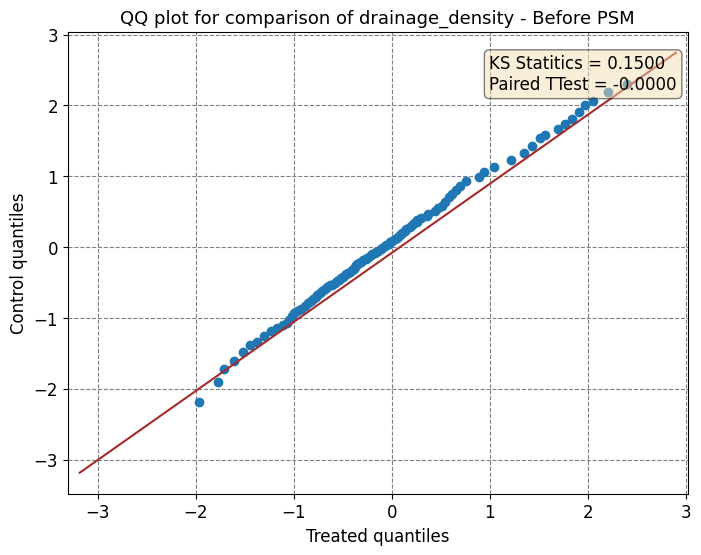

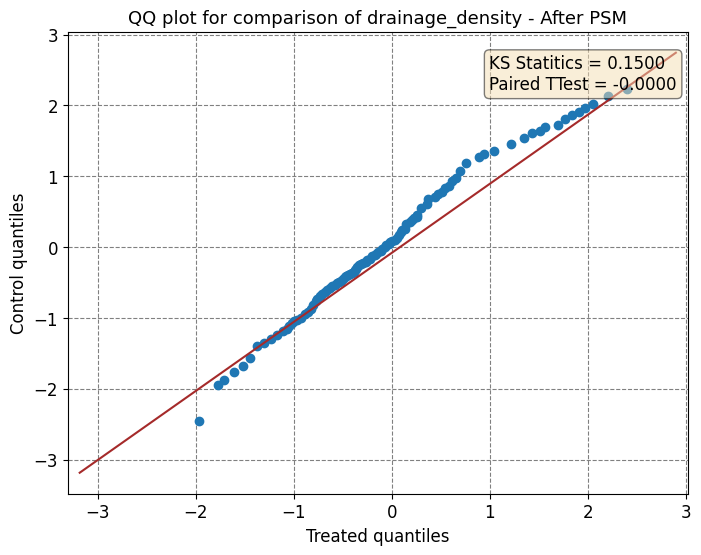

In [ ]:
generate_qq_plot(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

###HSG

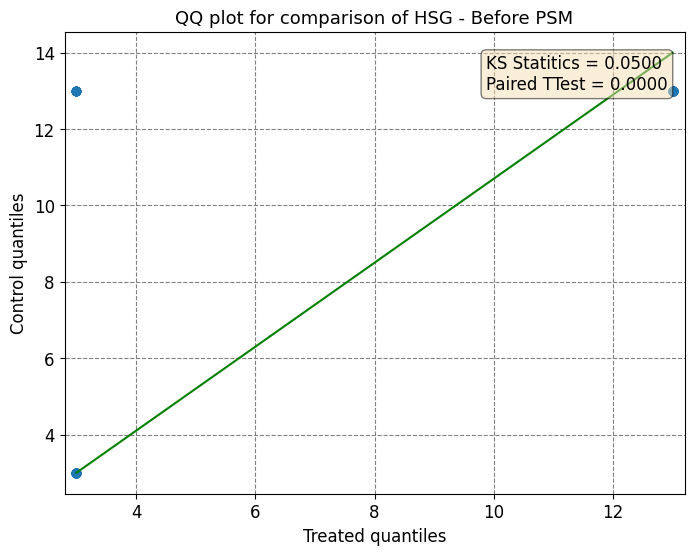

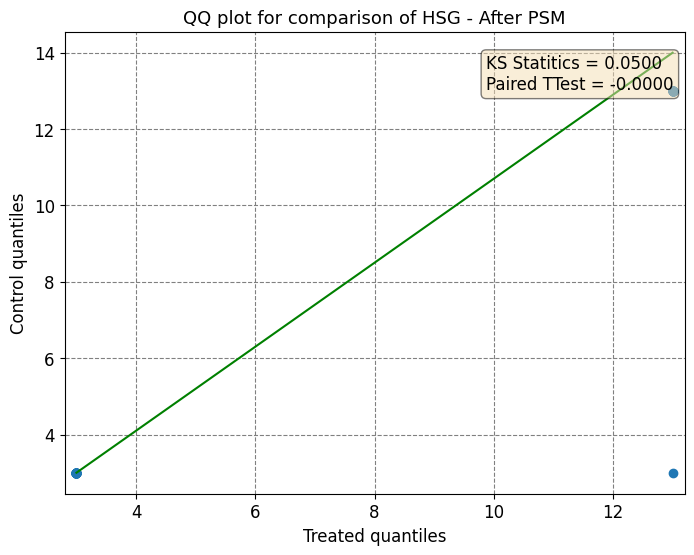

In [ ]:
generate_qq_plot(treated_df, cf_df, 'HSG', 'green', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'HSG', 'green', second)

###CEC

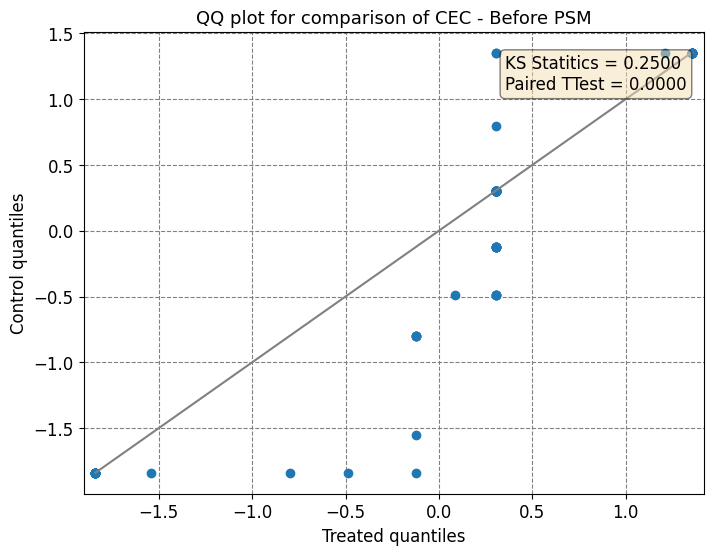

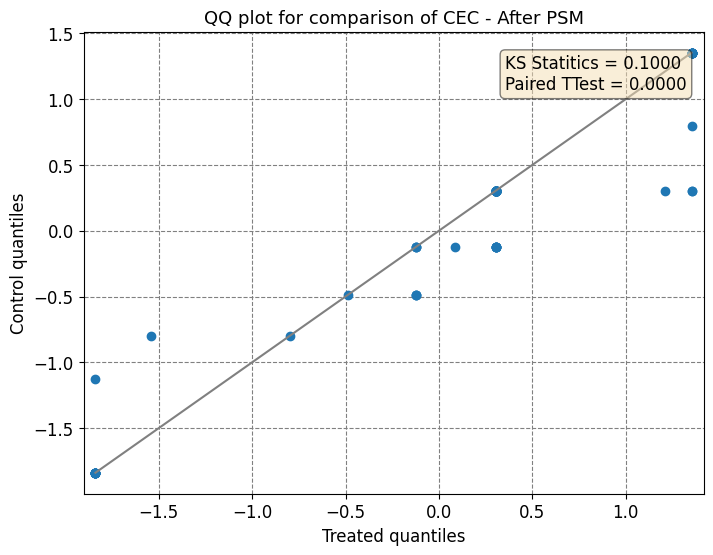

In [ ]:
generate_qq_plot(treated_df, cf_df, 'CEC', 'grey', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'CEC', 'grey', second)

###PH

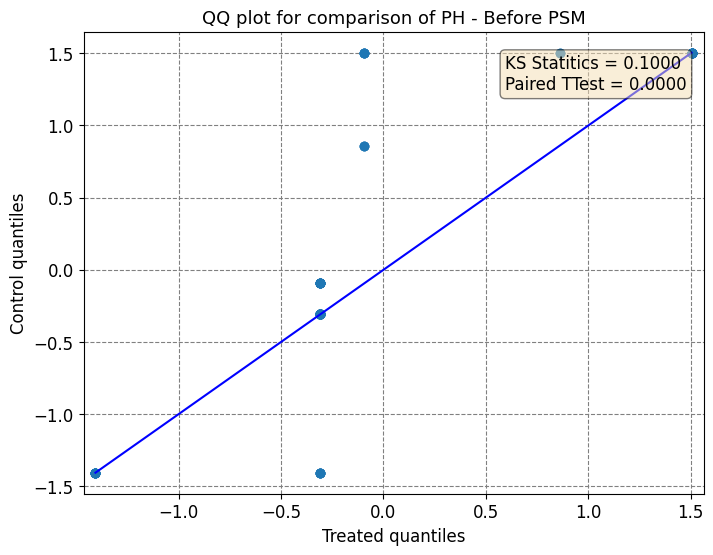

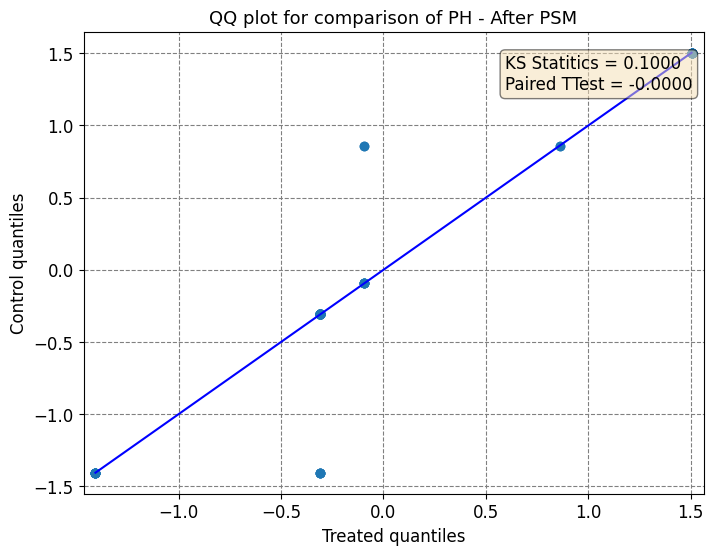

In [ ]:
generate_qq_plot(treated_df, cf_df, 'PH', 'blue', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'PH', 'blue', second)

###OC

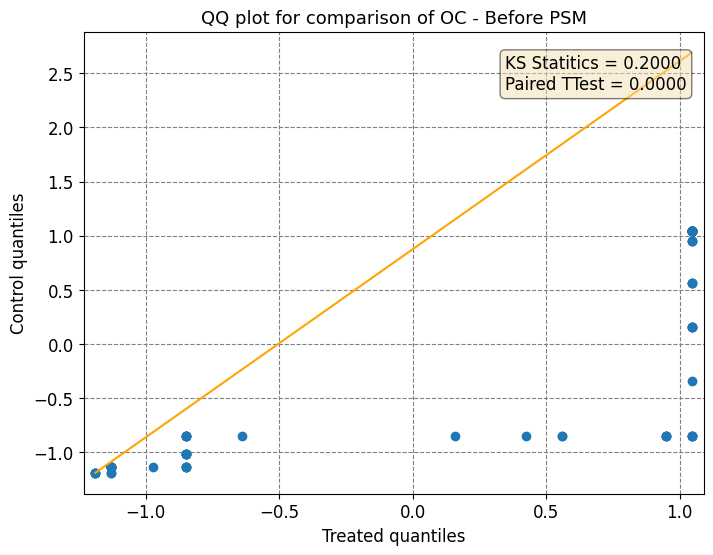

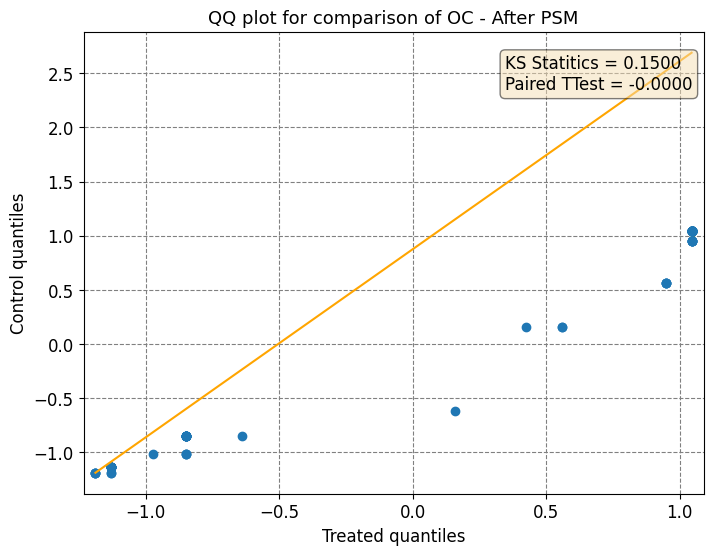

In [ ]:
generate_qq_plot(treated_df, cf_df, 'OC', 'orange', first)
print()
generate_qq_plot(treated_dfn, cf_dfn, 'OC', 'orange', second)

##Paired T Test

###Elevation

In [ ]:
paired_ttest(treated_df, cf_df, 'elevation', 'olive', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'elevation', 'olive', second)

Before PSM:- statistics : 3.7543885864609307e-17, pvalue : 1.0
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.006499767700092642, statistic_sign=1)

After PSM:- statistics : 2.8589157934330304e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.25, pvalue=0.571336004933722, statistic_location=0.009749651550138948, statistic_sign=1)


###Slope

In [ ]:
paired_ttest(treated_df, cf_df, 'slope', 'maroon', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'slope', 'maroon', second)

Before PSM:- statistics : -1.512843448190542e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.0027790702669306788, statistic_sign=1)

After PSM:- statistics : -4.467139027172221e-16, pvalue : 0.9999999999999997
KstestResult(statistic=0.3, pvalue=0.33559098126008213, statistic_location=0.0027790702669306788, statistic_sign=1)


###Distance to Closest River

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_river', 'navy', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_river', 'navy', second)

Before PSM:- statistics : -9.451961920105868e-17, pvalue : 1.0
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.00961777058164796, statistic_sign=1)

After PSM:- statistics : 1.2795303852462679e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.10579547639812757, statistic_sign=1)


###Flow Accumulation

In [ ]:
paired_ttest(treated_df, cf_df, 'flow_accumulation', 'indigo', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'flow_accumulation', 'indigo', second)

Before PSM:- statistics : -2.942537579963044e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.25, pvalue=0.571336004933722, statistic_location=0.19338973596823286, statistic_sign=1)

After PSM:- statistics : 2.3118678901416473e-15, pvalue : 0.9999999999999982
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.1547117887745863, statistic_sign=-1)


###Distance to Closest Lineament

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_lin', 'saddlebrown', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_lin', 'saddlebrown', second)

Before PSM:- statistics : 6.098109401567314e-16, pvalue : 0.9999999999999996
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.012615906049303391, statistic_sign=1)

After PSM:- statistics : 1.0718090382582234e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=0.012615906049303391, statistic_sign=1)


###Distance to Closest Road

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_road', 'gold', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_road', 'gold', second)

Before PSM:- statistics : -4.522886991849072e-16, pvalue : 0.9999999999999997
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.09062260930725273, statistic_sign=-1)

After PSM:- statistics : -4.4035537682985987e-16, pvalue : 0.9999999999999997
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.2695145254332546, statistic_sign=1)


###Recent Cropping Intensity

In [ ]:
paired_ttest(treated_df, cf_df, 'cropping_intensity_2016-2017', 'lightgreen', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'cropping_intensity_2016-2017', 'lightgreen', second)

Before PSM:- statistics : -3.550152844941866e-15, pvalue : 0.9999999999999972
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.6909788867562405, statistic_sign=1)

After PSM:- statistics : -1.4633153897027698e-15, pvalue : 0.9999999999999989
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.6909788867562405, statistic_sign=1)


###Distance to Closest Upstream Forest

In [ ]:
paired_ttest(treated_df, cf_df, 'dist_closest_upstream_forest', 'brown', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'dist_closest_upstream_forest', 'brown', second)

Before PSM:- statistics : 1.3969790033430916e-15, pvalue : 0.9999999999999989
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=0.17649140544207725, statistic_sign=1)

After PSM:- statistics : 2.3460375616530144e-15, pvalue : 0.9999999999999982
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=0.25150025275496035, statistic_sign=1)


###Proximity to Water Pixels

In [ ]:
paired_ttest(treated_df, cf_df, 'proximity_water', 'aqua', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'proximity_water', 'aqua', second)

Before PSM:- statistics : -9.568405663309226e-16, pvalue : 0.9999999999999992
KstestResult(statistic=0.3, pvalue=0.33559098126008213, statistic_location=0.34917066959965304, statistic_sign=-1)

After PSM:- statistics : 1.548744128834019e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.2163501531365397, statistic_sign=-1)


###Drainage_density

In [ ]:
paired_ttest(treated_df, cf_df, 'drainage_density', 'brown', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'drainage_density', 'brown', second)

Before PSM:- statistics : -4.49708535604178e-16, pvalue : 0.9999999999999997
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.009462658731535484, statistic_sign=1)

After PSM:- statistics : -1.8119442896107848e-16, pvalue : 0.9999999999999998
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.07885548942946224, statistic_sign=1)


###HSG

In [ ]:
paired_ttest(treated_df, cf_df, 'HSG', 'grey', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'HSG', 'grey', second)

Before PSM:- statistics : 0.0, pvalue : 1.0
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=1.0767754318618041, statistic_sign=1)

After PSM:- statistics : -5.0214140021334425e-15, pvalue : 0.999999999999996
KstestResult(statistic=0.05, pvalue=0.9999999999999998, statistic_location=1.0767754318618041, statistic_sign=1)


###CEC

In [ ]:
paired_ttest(treated_df, cf_df, 'CEC', 'blue', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'CEC', 'blue', second)

Before PSM:- statistics : 0.0, pvalue : 1.0
KstestResult(statistic=0.25, pvalue=0.571336004933722, statistic_location=0.0, statistic_sign=1)

After PSM:- statistics : 1.0236085349412233e-15, pvalue : 0.9999999999999991
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=0.07815152706746116, statistic_sign=1)


###PH

In [ ]:
paired_ttest(treated_df, cf_df, 'PH', 'orange', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'PH', 'orange', second)

Before PSM:- statistics : 9.044785571982387e-16, pvalue : 0.9999999999999993
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=1.1014751159894984, statistic_sign=1)

After PSM:- statistics : -4.17718684547602e-16, pvalue : 0.9999999999999997
KstestResult(statistic=0.1, pvalue=0.9999923931635496, statistic_location=1.1014751159894984, statistic_sign=1)


###OC

In [ ]:
paired_ttest(treated_df, cf_df, 'OC', 'green', first)
print()
paired_ttest(treated_dfn, cf_dfn, 'OC', 'green', second)

Before PSM:- statistics : 1.3375992473587415e-16, pvalue : 0.9999999999999999
KstestResult(statistic=0.2, pvalue=0.8319696107963263, statistic_location=0.0, statistic_sign=1)

After PSM:- statistics : -7.796077098353519e-16, pvalue : 0.9999999999999993
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=0.017191822880422883, statistic_sign=1)
